# Alpha-rarefactions and spike-ins Shipping-16S

In [1]:
import pandas as pd
import os

import tkinter as tk

In [2]:
import qiime2 as q2

from qiime2 import (Artifact,
                    Metadata as qmd)

from qiime2.plugins import (cutadapt,
                            demux,
                            feature_table as qft,
                            taxa as q2t,)

from qiime2 import Metadata
from qiime2 import Visualization

from qiime2.plugins.feature_table.methods import (merge_seqs, merge, filter_seqs, filter_samples, filter_features) 
import qiime2.plugins.feature_classifier.actions as feature_classifier_actions
import qiime2.plugins.metadata.actions as metadata_actions
import qiime2.plugins.taxa.actions as taxa_actions
import qiime2.plugins.phylogeny.actions as phylogeny_actions
from qiime2.plugins.fragment_insertion.methods import sepp


%matplotlib inline

fatal: bad revision 'HEAD'
fatal: bad revision 'HEAD'


In [3]:
# import os
# import qiime2
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define the working directory
# wd = '/home/meyeanni/cloud/meyeanni/LP4/artifacts/16S/split_exp/shipping_v2'

# # Change to the working directory
# os.chdir(wd)

# # Verify current working directory
# print("Current working directory:", os.getcwd())

FileNotFoundError: [Errno 2] No such file or directory: '/home/meyeanni/cloud/meyeanni/LP4/artifacts/16S/split_exp/shipping_v2'

In [5]:
import os
import qiime2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the working directory
wd = '/Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/16S'

# Change to the working directory
os.chdir(wd)

# Verify current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/meyeanni/Desktop/git_sourdough/SourdoughFlow/LP4/shipping_analysis/shipping_data/16S


16S ASVs:

In [5]:
! qiime diversity alpha-rarefaction \
    --i-table ASVs/bacteria-table-filt-shipping.qza \
    --p-min-depth 50 \
    --p-max-depth 5000 \
    --m-metadata-file shipping_general_metadata.tsv  \
    --o-visualization ASVs/alpha_rarefaction/alpha-rarefaction-curves.qzv

Saved Visualization to: ASVs/alpha_rarefaction/alpha-rarefaction-curves.qzv


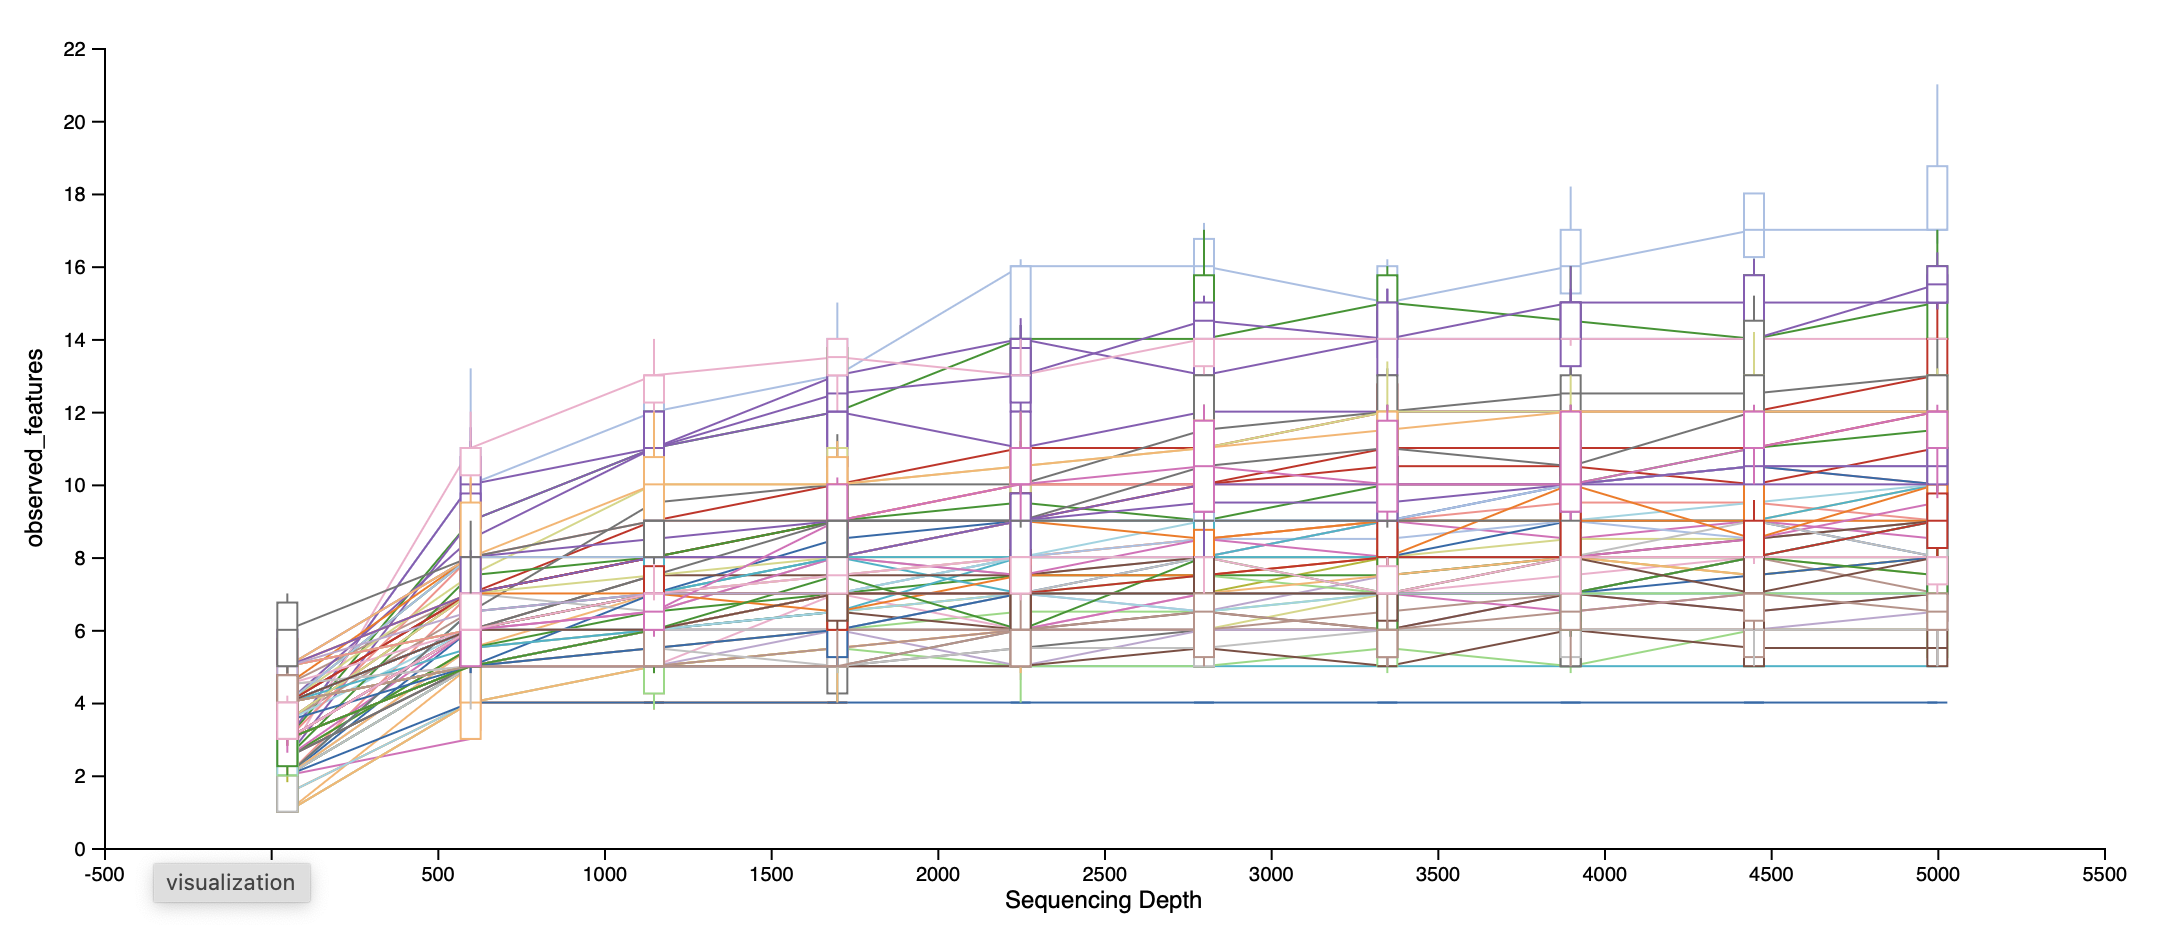

go with 1000 and then spike in the ones that have less than 1000 reads

In [6]:
! qiime diversity core-metrics \
  --i-table ASVs/bacteria-table-filt-shipping.qza \
  --m-metadata-file shipping_general_metadata.tsv \
  --p-sampling-depth 1000 \
  --output-dir ASVs/alpha_rarefaction/core-metrics-results-1000

Saved FeatureTable[Frequency] to: ASVs/alpha_rarefaction/core-metrics-results-1000/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction/core-metrics-results-1000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction/core-metrics-results-1000/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction/core-metrics-results-1000/evenness_vector.qza
Saved DistanceMatrix to: ASVs/alpha_rarefaction/core-metrics-results-1000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: ASVs/alpha_rarefaction/core-metrics-results-1000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: ASVs/alpha_rarefaction/core-metrics-results-1000/jaccard_pcoa_results.qza
Saved PCoAResults to: ASVs/alpha_rarefaction/core-metrics-results-1000/bray_curtis_pcoa_results.qza
Saved Visualization to: ASVs/alpha_rarefaction/core-metrics-results-1000/jaccard_emperor.qzv
Saved Visualization to: ASVs/alpha_rarefaction/core-metrics-results-1000/br

In [7]:
! qiime feature-table filter-samples \
  --i-table ASVs/bacteria-table-filt-shipping.qza \
  --p-max-frequency 999 \
  --o-filtered-table ASVs/samples_less_than_1000_reads.qza

Saved FeatureTable[Frequency] to: ASVs/samples_less_than_1000_reads.qza


In [8]:
from qiime2 import Artifact
from qiime2.plugins.feature_table.methods import relative_frequency

# Load your feature table artifact
feature_table = Artifact.load("ASVs/alpha_rarefaction/core-metrics-results-1000/rarefied_table.qza")

# Normalize the feature table to relative frequencies
relative_freq_table = relative_frequency(table=feature_table)

# Extract the relative frequency feature table
relative_freq_table = relative_freq_table.relative_frequency_table

relative_freq_table.save("ASVs/alpha_rarefaction/core-metrics-results-1000/relative_frequency_table.qza")

'ASVs/alpha_rarefaction/core-metrics-results-1000/relative_frequency_table.qza'

In [9]:
from qiime2 import Artifact
from qiime2.plugins.feature_table.methods import relative_frequency

# Load your feature table artifact
feature_table = Artifact.load("ASVs/samples_less_than_1000_reads.qza")

# Normalize the feature table to relative frequencies
relative_freq_table = relative_frequency(table=feature_table)

# Extract the relative frequency feature table
relative_freq_table = relative_freq_table.relative_frequency_table

relative_freq_table.save("ASVs/alpha_rarefaction/core-metrics-results-1000/relative_frequency_table_less_than_1000_reads.qza")

'ASVs/alpha_rarefaction/core-metrics-results-1000/relative_frequency_table_less_than_1000_reads.qza'

### Then make the same for OTUs, also 1000 reads and spike in the ones that do not pass

In [10]:
! qiime diversity alpha-rarefaction \
    --i-table OTUs/clustered-table-SILVA99-shipping.qza \
    --p-min-depth 50 \
    --p-max-depth 5000 \
    --m-metadata-file shipping_general_metadata.tsv  \
    --o-visualization OTUs/alpha_rarefaction/alpha-rarefaction-curves.qzv

Saved Visualization to: OTUs/alpha_rarefaction/alpha-rarefaction-curves.qzv


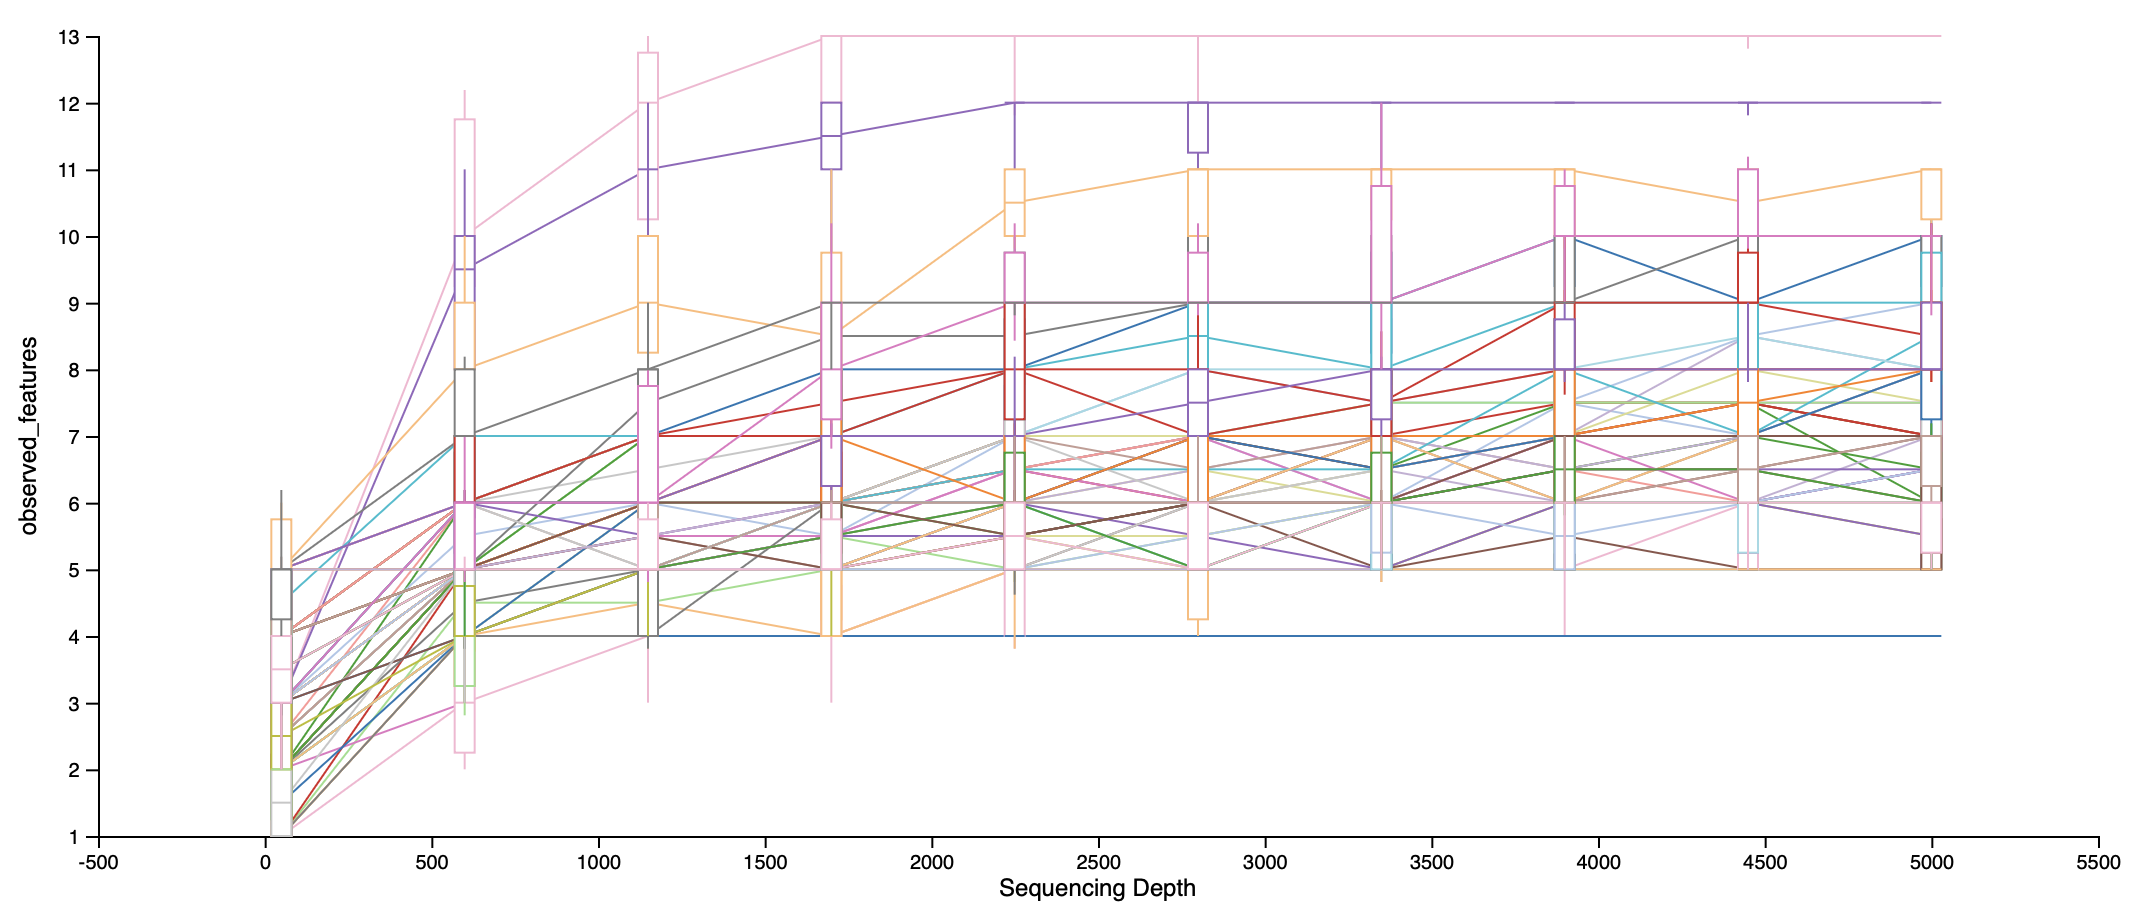

In [11]:
! qiime diversity core-metrics \
  --i-table OTUs/clustered-table-SILVA99-shipping.qza \
  --m-metadata-file shipping_general_metadata.tsv \
  --p-sampling-depth 1000 \
  --output-dir OTUs/alpha_rarefaction/core-metrics-results-1000

Saved FeatureTable[Frequency] to: OTUs/alpha_rarefaction/core-metrics-results-1000/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: OTUs/alpha_rarefaction/core-metrics-results-1000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: OTUs/alpha_rarefaction/core-metrics-results-1000/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: OTUs/alpha_rarefaction/core-metrics-results-1000/evenness_vector.qza
Saved DistanceMatrix to: OTUs/alpha_rarefaction/core-metrics-results-1000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: OTUs/alpha_rarefaction/core-metrics-results-1000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: OTUs/alpha_rarefaction/core-metrics-results-1000/jaccard_pcoa_results.qza
Saved PCoAResults to: OTUs/alpha_rarefaction/core-metrics-results-1000/bray_curtis_pcoa_results.qza
Saved Visualization to: OTUs/alpha_rarefaction/core-metrics-results-1000/jaccard_emperor.qzv
Saved Visualization to: OTUs/alpha_rarefaction/core-metrics-results-1000/br

In [12]:
! qiime feature-table filter-samples \
  --i-table OTUs/clustered-table-SILVA99-shipping.qza \
  --p-max-frequency 999 \
  --o-filtered-table OTUs/samples_less_than_1000_reads.qza

Saved FeatureTable[Frequency] to: OTUs/samples_less_than_1000_reads.qza


In [13]:
from qiime2 import Artifact
from qiime2.plugins.feature_table.methods import relative_frequency

# Load your feature table artifact
feature_table = Artifact.load("OTUs/alpha_rarefaction/core-metrics-results-1000/rarefied_table.qza")

# Normalize the feature table to relative frequencies
relative_freq_table = relative_frequency(table=feature_table)

# Extract the relative frequency feature table
relative_freq_table = relative_freq_table.relative_frequency_table

relative_freq_table.save("OTUs/alpha_rarefaction/core-metrics-results-1000/relative_frequency_table.qza")

'OTUs/alpha_rarefaction/core-metrics-results-1000/relative_frequency_table.qza'

In [14]:
from qiime2 import Artifact
from qiime2.plugins.feature_table.methods import relative_frequency

# Load your feature table artifact
feature_table = Artifact.load("OTUs/samples_less_than_1000_reads.qza")

# Normalize the feature table to relative frequencies
relative_freq_table = relative_frequency(table=feature_table)

# Extract the relative frequency feature table
relative_freq_table = relative_freq_table.relative_frequency_table

relative_freq_table.save("OTUs/alpha_rarefaction/core-metrics-results-1000/relative_frequency_table_less_than_1000_reads.qza")

'OTUs/alpha_rarefaction/core-metrics-results-1000/relative_frequency_table_less_than_1000_reads.qza'

### Then use the prevalence/abundance filter to remove very rare taxa that should not be in there (probably, since those should be triplicates anyways..)

in at least 2 samples, and features have need to have an abundance of at least 20 reads across all samples

In [15]:
#instead of later processing in python, try the prevalence and abundance filtering in qiime2 for all above tables:
! qiime feature-table filter-features \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/rarefied_table.qza \
  --p-min-samples 2 \
  --p-min-frequency 20 \
  --o-filtered-table ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza

Saved FeatureTable[Frequency] to: ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza


In [16]:
! qiime feature-table filter-features \
  --i-table ASVs/samples_less_than_1000_reads.qza \
  --p-min-samples 1 \
  --p-min-frequency 20 \
  --o-filtered-table ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_samples_less_than_1000_reads.qza

Saved FeatureTable[Frequency] to: ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_samples_less_than_1000_reads.qza


In [17]:
#also create a combined version of the two tables:
! qiime feature-table merge \
  --i-tables ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_samples_less_than_1000_reads.qza \
  --p-overlap-method sum \
  --o-merged-table ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza

Saved FeatureTable[Frequency] to: ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza


In [18]:
#recalculate jaccard and bray curtis distances for the filtered tables (all three above), without rarefaction:
! qiime diversity beta --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza --p-metric jaccard --o-distance-matrix ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_jaccard_distance_matrix.qza
! qiime diversity beta --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza --p-metric braycurtis --o-distance-matrix ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_braycurtis_distance_matrix.qza

#and then for the merged one:
! qiime diversity beta --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza --p-metric jaccard --o-distance-matrix ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_jaccard_distance_matrix.qza
! qiime diversity beta --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza --p-metric braycurtis --o-distance-matrix ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_braycurtis_distance_matrix.qza

Saved DistanceMatrix to: ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_jaccard_distance_matrix.qza
Saved DistanceMatrix to: ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_braycurtis_distance_matrix.qza
Saved DistanceMatrix to: ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_jaccard_distance_matrix.qza
Saved DistanceMatrix to: ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_braycurtis_distance_matrix.qza


In [19]:
# Example for filtered table
! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza \
  --p-metric shannon \
  --o-alpha-diversity ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_shannon.qza

! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza \
  --p-metric simpson \
  --o-alpha-diversity ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_simpson.qza

! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza \
  --p-metric chao1 \
  --o-alpha-diversity ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_chao1.qza



! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza \
  --p-metric shannon \
  --o-alpha-diversity ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_shannon.qza

! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza \
  --p-metric simpson \
  --o-alpha-diversity ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_simpson.qza

! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza \
  --p-metric chao1 \
  --o-alpha-diversity ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_chao1.qza  


Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_shannon.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_simpson.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_chao1.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_shannon.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_simpson.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_chao1.qza


In [6]:
! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza \
  --p-metric pielou_e \
  --o-alpha-diversity ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_evenness.qza


fatal: bad revision 'HEAD'
fatal: bad revision 'HEAD'
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_evenness.qza


### and then do exactly the same for the OTUs

In [20]:
#instead of later processing in python, try the prevalence and abundance filtering in qiime2 for all above tables:
! qiime feature-table filter-features \
  --i-table OTUs/alpha_rarefaction/core-metrics-results-1000/rarefied_table.qza \
  --p-min-samples 2 \
  --p-min-frequency 20 \
  --o-filtered-table OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza

Saved FeatureTable[Frequency] to: OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza


In [21]:
! qiime feature-table filter-features \
  --i-table OTUs/samples_less_than_1000_reads.qza \
  --p-min-samples 1 \
  --p-min-frequency 20 \
  --o-filtered-table OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_samples_less_than_1000_reads.qza

Saved FeatureTable[Frequency] to: OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_samples_less_than_1000_reads.qza


In [22]:
#also create a combined version of the two tables:
! qiime feature-table merge \
  --i-tables OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_samples_less_than_1000_reads.qza \
  --p-overlap-method sum \
  --o-merged-table OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza

Saved FeatureTable[Frequency] to: OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza


In [23]:
#recalculate jaccard and bray curtis distances for the filtered tables (all three above), without rarefaction:
! qiime diversity beta --i-table OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza --p-metric jaccard --o-distance-matrix OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_jaccard_distance_matrix.qza
! qiime diversity beta --i-table OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza --p-metric braycurtis --o-distance-matrix OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_braycurtis_distance_matrix.qza

#and then for the merged one:
! qiime diversity beta --i-table OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza --p-metric jaccard --o-distance-matrix OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_jaccard_distance_matrix.qza
! qiime diversity beta --i-table OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza --p-metric braycurtis --o-distance-matrix OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_braycurtis_distance_matrix.qza

Saved DistanceMatrix to: OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_jaccard_distance_matrix.qza
Saved DistanceMatrix to: OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_braycurtis_distance_matrix.qza
Saved DistanceMatrix to: OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_jaccard_distance_matrix.qza
Saved DistanceMatrix to: OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_braycurtis_distance_matrix.qza


In [24]:
# Example for filtered table
! qiime diversity alpha \
  --i-table OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza \
  --p-metric shannon \
  --o-alpha-diversity OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_shannon.qza

! qiime diversity alpha \
  --i-table OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza \
  --p-metric simpson \
  --o-alpha-diversity OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_simpson.qza

! qiime diversity alpha \
  --i-table OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza \
  --p-metric chao1 \
  --o-alpha-diversity OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_chao1.qza



! qiime diversity alpha \
  --i-table OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza \
  --p-metric shannon \
  --o-alpha-diversity OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_shannon.qza

! qiime diversity alpha \
  --i-table OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza \
  --p-metric simpson \
  --o-alpha-diversity OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_simpson.qza

! qiime diversity alpha \
  --i-table OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza \
  --p-metric chao1 \
  --o-alpha-diversity OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_chao1.qza  

Saved SampleData[AlphaDiversity] to: OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_shannon.qza
Saved SampleData[AlphaDiversity] to: OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_simpson.qza
Saved SampleData[AlphaDiversity] to: OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_chao1.qza
Saved SampleData[AlphaDiversity] to: OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_shannon.qza
Saved SampleData[AlphaDiversity] to: OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_simpson.qza
Saved SampleData[AlphaDiversity] to: OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_chao1.qza


### then make new relative frequency tables with the filtered feature tables

In [25]:
from qiime2 import Artifact
from qiime2.plugins.feature_table.methods import relative_frequency

# Load your feature table artifact
feature_table = Artifact.load("ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza")

# Normalize the feature table to relative frequencies
relative_freq_table = relative_frequency(table=feature_table)

# Extract the relative frequency feature table
relative_freq_table = relative_freq_table.relative_frequency_table

relative_freq_table.save("ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_relative_frequency_table.qza")

'ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_relative_frequency_table.qza'

In [26]:
from qiime2 import Artifact
from qiime2.plugins.feature_table.methods import relative_frequency

# Load your feature table artifact
feature_table = Artifact.load("ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza")

# Normalize the feature table to relative frequencies
relative_freq_table = relative_frequency(table=feature_table)

# Extract the relative frequency feature table
relative_freq_table = relative_freq_table.relative_frequency_table

relative_freq_table.save("ASVs/alpha_rarefaction/core-metrics-results-1000/merged_relative_frequency_table.qza")

'ASVs/alpha_rarefaction/core-metrics-results-1000/merged_relative_frequency_table.qza'

In [27]:
from qiime2 import Artifact
from qiime2.plugins.feature_table.methods import relative_frequency

# Load your feature table artifact
feature_table = Artifact.load("OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza")

# Normalize the feature table to relative frequencies
relative_freq_table = relative_frequency(table=feature_table)

# Extract the relative frequency feature table
relative_freq_table = relative_freq_table.relative_frequency_table

relative_freq_table.save("OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_relative_frequency_table.qza")

'OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_relative_frequency_table.qza'

In [28]:
from qiime2 import Artifact
from qiime2.plugins.feature_table.methods import relative_frequency

# Load your feature table artifact
feature_table = Artifact.load("OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza")

# Normalize the feature table to relative frequencies
relative_freq_table = relative_frequency(table=feature_table)

# Extract the relative frequency feature table
relative_freq_table = relative_freq_table.relative_frequency_table

relative_freq_table.save("OTUs/alpha_rarefaction/core-metrics-results-1000/merged_relative_frequency_table.qza")

'OTUs/alpha_rarefaction/core-metrics-results-1000/merged_relative_frequency_table.qza'

load metadata

In [29]:
metadata_16S = pd.read_csv("shipping_general_metadata.tsv", index_col=0, sep="\t")



In [30]:
metadata_16S

,identifier,row,column,temperature,day,replicate,well,DNA yield,DNA_total_yield_per_1g,pH,...,yeast CFUs,mannitol,glucose,fructose,sucrose,maltose,succinic acid,lactic acid,acetic acid,ethanol
SampleID,,,,,,,,,,,,,,,,,,,,,
366294_209-LP4-16S-0709,W00.00.00,E,5.0,20,0,0,E05,7.819449,5212.964986,3.71,...,6.95664,0.864599,0.412389,0.040404,-0.029735456,4.793423904,0.692311,5.529438,1.114068,9.050184
366294_255-LP4-16S-0755,W04.01.01,C,11.0,4,1,1,C11,7.974214,5316.141023,3.66,...,7.51433,1.678354,0.276854,0.039286,0.02639304,0.925282319,1.589185,33.236525,5.061100,38.362742
366294_237-LP4-16S-0737,W04.01.02,A,9.0,4,2,1,A09,3.321537,2214.357237,3.67,...,7.45165,0.662367,0.097518,0.007847,-0.047546617,0.216395132,0.738389,4.979223,1.166086,11.177099
366294_198-LP4-16S-0698,W04.01.03,B,4.0,4,3,1,B04,6.282538,4188.357582,3.68,...,7.31960,1.717166,0.214524,0.015318,-0.059561247,0.397240918,1.762174,39.645533,6.040320,44.776757
366294_240-LP4-16S-0740,W04.01.04,D,9.0,4,4,1,D09,5.447592,3631.727200,3.65,...,7.33935,1.206856,0.155969,-0.003239,-0.005661029,0.144521676,1.044392,17.353094,2.135035,19.508957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_196-LP4-16S-0696,W30.03.07,H,3.0,30,7,3,H03,1.280016,853.343932,3.80,...,4.98345,1.412295,0.129658,0.016761,#VALUE!,#VALUE!,1.844159,16.756220,3.679490,18.576245
366294_245-LP4-16S-0745,W30.03.10,A,10.0,30,10,3,A10,1.207511,805.007259,3.81,...,4.06306,1.287481,0.150572,0.031233,#VALUE!,#VALUE!,0.753777,9.580818,6.009673,13.338592
366294_252-LP4-16S-0752,W30.03.14,H,10.0,30,14,3,H10,0.645679,430.452236,3.89,...,3.20412,1.272025,0.251672,0.083768,-0.030172078,#VALUE!,4.609512,12.322692,31.336045,8.974766


### then import distance matrices

ASVs:

In [31]:
import qiime2
from skbio.stats.distance import permanova, DistanceMatrix

#load distance matrices for LP5 (both the non-merged and merged tables):
#jaccard:
jaccard_dm_16S_ASV = qiime2.Artifact.load('ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_ASV = jaccard_dm_16S_ASV.view(DistanceMatrix)

jaccard_dm_16S_ASV_merged = qiime2.Artifact.load('ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_ASV_merged = jaccard_dm_16S_ASV_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_16S_ASV = qiime2.Artifact.load('ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table_braycurtis_distance_matrix.qza')
bray_dm_16S_ASV = bray_dm_16S_ASV.view(DistanceMatrix)

bray_dm_16S_ASV_merged = qiime2.Artifact.load('ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table_braycurtis_distance_matrix.qza')
bray_dm_16S_ASV_merged = bray_dm_16S_ASV_merged.view(DistanceMatrix)

OTUs:

In [32]:
jaccard_dm_16S_OTU = qiime2.Artifact.load('OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_OTU = jaccard_dm_16S_OTU.view(DistanceMatrix)

jaccard_dm_16S_OTU_merged = qiime2.Artifact.load('OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_jaccard_distance_matrix.qza')
jaccard_dm_16S_OTU_merged = jaccard_dm_16S_OTU_merged.view(DistanceMatrix)

#bray curtis:
bray_dm_16S_OTU = qiime2.Artifact.load('OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table_braycurtis_distance_matrix.qza')
bray_dm_16S_OTU = bray_dm_16S_OTU.view(DistanceMatrix)

bray_dm_16S_OTU_merged = qiime2.Artifact.load('OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table_braycurtis_distance_matrix.qza')
bray_dm_16S_OTU_merged = bray_dm_16S_OTU_merged.view(DistanceMatrix)

In [33]:
from skbio.stats.ordination import pcoa

dms = {
    'jaccard_dm_16S_ASV': jaccard_dm_16S_ASV,
    'jaccard_dm_16S_ASV_merged': jaccard_dm_16S_ASV_merged,
    'bray_dm_16S_ASV ': bray_dm_16S_ASV ,
    'bray_dm_16S_ASV_merged': bray_dm_16S_ASV_merged,
    'jaccard_dm_16S_OTU': jaccard_dm_16S_OTU,
    'jaccard_dm_16S_OTU_merged': jaccard_dm_16S_OTU_merged,
    'bray_dm_16S_OTU': bray_dm_16S_OTU,
    'bray_dm_16S_OTU_merged': bray_dm_16S_OTU_merged

    }

### then calculate pcoa

In [36]:
import pandas as pd
from skbio.stats.ordination import pcoa

In [34]:
import pandas as pd
from skbio.stats.ordination import pcoa



# Function to compute PCoA
def compute_pcoa(distance_matrix, n_components=2):
    """Performs PCoA on a distance matrix and returns coordinates + variance explained."""
    # Run PCoA
    pcoa_res = pcoa(distance_matrix)
    
    # Extract transformed coordinates
    coordinates = pd.DataFrame(
        pcoa_res.samples.iloc[:, :n_components].values,  # Get first n PCoA components
        index=distance_matrix.ids,  # Keep original sample names
        columns=[f"PCo{i+1}" for i in range(n_components)]  # Rename components
    )
    
    # Extract variance explained (proportion of total variance per component)
    variance_explained = pcoa_res.proportion_explained.values[:n_components]

    return coordinates, variance_explained


In [37]:
pcoa_jaccard_ASV, variance_jaccard_ASV = compute_pcoa(jaccard_dm_16S_ASV)
pcoa_bray_curtis_ASV, variance_bray_curtis_ASV = compute_pcoa(bray_dm_16S_ASV)
pcoa_jaccard_ASV_merged, variance_jaccard_ASV_merged = compute_pcoa(jaccard_dm_16S_ASV_merged)
pcoa_bray_curtis_ASV_merged, variance_bray_curtis_ASV_merged = compute_pcoa(bray_dm_16S_ASV_merged)

pcoa_jaccard_OTU, variance_jaccard_OTU = compute_pcoa(jaccard_dm_16S_OTU)
pcoa_bray_curtis_OTU, variance_bray_curtis_OTU = compute_pcoa(bray_dm_16S_OTU)
pcoa_jaccard_OTU_merged, variance_jaccard_OTU_merged = compute_pcoa(jaccard_dm_16S_OTU_merged)
pcoa_bray_curtis_OTU_merged, variance_bray_curtis_OTU_merged = compute_pcoa(bray_dm_16S_OTU_merged)



/home/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.20093910638103374 and the largest is 1.1849960793897276.
  warn(
/home/meyeanni/miniconda3/envs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful.

check if it makes sense:

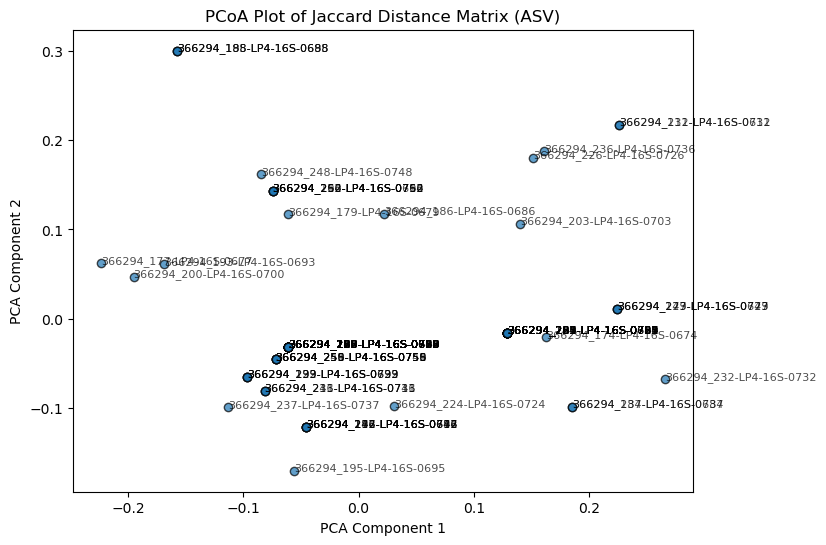

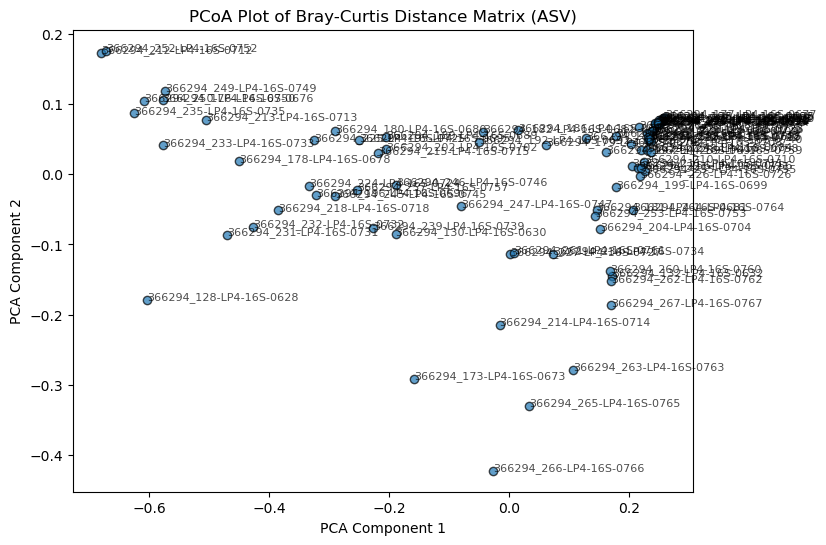

In [38]:
import matplotlib.pyplot as plt

# Function to plot PCA results
def plot_pca(pca_df, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], alpha=0.7, edgecolors="black")

    # Annotate points with sample IDs
    for i, txt in enumerate(pca_df.index):
        plt.annotate(txt, (pca_df.iloc[i, 0], pca_df.iloc[i, 1]), fontsize=8, alpha=0.7)

    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)
    plt.show()

# Example: Plot PCA for Jaccard LP5
plot_pca(pcoa_jaccard_ASV, "PCoA Plot of Jaccard Distance Matrix (ASV)")

# Example: Plot PCA for Bray-Curtis LP5
plot_pca(pcoa_bray_curtis_ASV, "PCoA Plot of Bray-Curtis Distance Matrix (ASV)")

-->> looks about right

In [39]:
def align_pcoa_matrices(pcoa1, pcoa2):
    """
    Aligns two PCoA DataFrames by keeping only shared samples.
    Returns aligned DataFrames and lists of missing samples.
    """
    common_samples = pcoa1.index.intersection(pcoa2.index)
    
    missing_in_pcoa1 = pcoa2.index.difference(pcoa1.index)
    missing_in_pcoa2 = pcoa1.index.difference(pcoa2.index)
    
    print(f"Shared Samples: {len(common_samples)}")
    print(f"Samples missing in first PCoA: {len(missing_in_pcoa1)}")
    print(f"Samples missing in second PCoA: {len(missing_in_pcoa2)}")
    
    return pcoa1.loc[common_samples], pcoa2.loc[common_samples], missing_in_pcoa1, missing_in_pcoa2

# Align PCoAs before Procrustes
#bray_curtis pcoa:

pcoa_bray_ASV_ASVmerge_align, pcoa_bray_ASVmerge_ASV_align, missing_bray_ASV_ASVmerge, missing_bray_ASVmerge_ASV = align_pcoa_matrices(pcoa_bray_curtis_ASV, pcoa_bray_curtis_ASV_merged)
pcoa_bray_OTU_OTUmerge_align, pcoa_bray_OTUmerge_OTU_align, missing_bray_OTU_OTUmerge, missing_bray_OTUmerge_OTU = align_pcoa_matrices(pcoa_bray_curtis_OTU, pcoa_bray_curtis_OTU_merged)

pcoa_jaccard_ASV_ASVmerge_align, pcoa_jaccard_ASVmerge_ASV_align, missing_jaccard_ASV_ASVmerge, missing_jaccard_ASVmerge_ASV = align_pcoa_matrices(pcoa_jaccard_ASV, pcoa_jaccard_ASV_merged)
pcoa_jaccard_OTU_OTUmerge_align, pcoa_jaccard_OTUmerge_OTU_align, missing_jaccard_OTU_OTUmerge, missing_jaccard_OTUmerge_OTU = align_pcoa_matrices(pcoa_jaccard_OTU, pcoa_jaccard_OTU_merged)


pcoa_jaccard_OTU_ASV_align, pcoa_jaccard_ASV_OTU_align, missing_jaccard_OTU_ASV, missing_jaccard_ASV_OTU = align_pcoa_matrices(pcoa_jaccard_OTU_merged, pcoa_jaccard_ASV_merged)
pcoa_bray_OTU_ASV_align, pcoa_bray_ASV_OTU_align, missing_bray_OTU_ASV, missing_bray_ASV_OTU = align_pcoa_matrices(pcoa_bray_curtis_OTU_merged, pcoa_bray_curtis_ASV_merged)

Shared Samples: 87
Samples missing in first PCoA: 12
Samples missing in second PCoA: 0
Shared Samples: 87
Samples missing in first PCoA: 12
Samples missing in second PCoA: 0
Shared Samples: 87
Samples missing in first PCoA: 12
Samples missing in second PCoA: 0
Shared Samples: 87
Samples missing in first PCoA: 12
Samples missing in second PCoA: 0
Shared Samples: 99
Samples missing in first PCoA: 0
Samples missing in second PCoA: 0
Shared Samples: 99
Samples missing in first PCoA: 0
Samples missing in second PCoA: 0


-> 12 samples would be missing.. very suboptimal

In [40]:
from scipy.spatial import procrustes
import pandas as pd

def perform_procrustes(pcoa1, pcoa2):
    """
    Runs Procrustes analysis on aligned PCoA results and returns transformed coordinates + disparity.
    Ensures matrices are standardized before comparison.
    """
    # Convert DataFrames to numpy arrays
    mtx1, mtx2, disparity = procrustes(pcoa1.values, pcoa2.values)
    
    # Convert back to DataFrames, preserving original index and column names
    return pd.DataFrame(mtx1, index=pcoa1.index, columns=pcoa1.columns), \
           pd.DataFrame(mtx2, index=pcoa2.index, columns=pcoa2.columns), disparity

# Bray–Curtis: ASV vs ASV_merged
pcoa_bray_ASV_ASVmerge_trans, pcoa_bray_ASVmerge_ASV_trans, disparity_bray_asv = perform_procrustes(
    pcoa_bray_ASV_ASVmerge_align, pcoa_bray_ASVmerge_ASV_align)

# Bray–Curtis: OTU vs OTU_merged
pcoa_bray_OTU_OTUmerge_trans, pcoa_bray_OTUmerge_OTU_trans, disparity_bray_otu = perform_procrustes(
    pcoa_bray_OTU_OTUmerge_align, pcoa_bray_OTUmerge_OTU_align)

# Jaccard: ASV vs ASV_merged
pcoa_jaccard_ASV_ASVmerge_trans, pcoa_jaccard_ASVmerge_ASV_trans, disparity_jaccard_asv = perform_procrustes(
    pcoa_jaccard_ASV_ASVmerge_align, pcoa_jaccard_ASVmerge_ASV_align)

# Jaccard: OTU vs OTU_merged
pcoa_jaccard_OTU_OTUmerge_trans, pcoa_jaccard_OTUmerge_OTU_trans, disparity_jaccard_otu = perform_procrustes(
    pcoa_jaccard_OTU_OTUmerge_align, pcoa_jaccard_OTUmerge_OTU_align)

# Cross-comparison: OTU_merged vs ASV_merged — Jaccard
pcoa_jaccard_OTU_ASV_trans, pcoa_jaccard_ASV_OTU_trans, disparity_jaccard_cross = perform_procrustes(
    pcoa_jaccard_OTU_ASV_align, pcoa_jaccard_ASV_OTU_align)

# Cross-comparison: OTU_merged vs ASV_merged — Bray–Curtis
pcoa_bray_OTU_ASV_trans, pcoa_bray_ASV_OTU_trans, disparity_bray_cross = perform_procrustes(
    pcoa_bray_OTU_ASV_align, pcoa_bray_ASV_OTU_align)




# Print results
# Print results
print(f"Procrustes Disparity - Bray Curtis PCoA ASV vs ASV-merge: {disparity_bray_asv:.4f}")
print(f"Procrustes Disparity - Bray Curtis PCoA OTU vs OTU-merge: {disparity_bray_otu:.4f}")
print(f"Procrustes Disparity - Jaccard PCoA ASV vs ASV-merge: {disparity_jaccard_asv:.4f}")

print(f"Procrustes Disparity - Jaccard PCoA OTU vs OTU-merge: {disparity_jaccard_otu:.4f}")
print(f"Procrustes Disparity - Bray Curtis PCoA ASV-OTU: {disparity_bray_cross:.4f}")
print(f"Procrustes Disparity - Jaccard PCoA ASV-OTU: {disparity_jaccard_cross:.4f}")

Procrustes Disparity - Bray Curtis PCoA ASV vs ASV-merge: 0.1259
Procrustes Disparity - Bray Curtis PCoA OTU vs OTU-merge: 0.1224
Procrustes Disparity - Jaccard PCoA ASV vs ASV-merge: 0.4319
Procrustes Disparity - Jaccard PCoA OTU vs OTU-merge: 0.2585
Procrustes Disparity - Bray Curtis PCoA ASV-OTU: 0.0019
Procrustes Disparity - Jaccard PCoA ASV-OTU: 0.4763


In [41]:
import numpy as np
from scipy.spatial import procrustes

# Function for Procrustes permutation test
def procrustes_permutation_test(pcoa1, pcoa2, num_permutations=1000):
    """
    Computes Procrustes disparity and runs a permutation test to assess significance.
    Ensures matrices are correctly aligned and standardized before comparison.
    """

    # Convert DataFrames to numpy arrays
    mtx1, mtx2, observed_disparity = procrustes(pcoa1.values, pcoa2.values)
    
    # Generate null distribution by shuffling rows of pcoa2
    permuted_disparities = []
    for _ in range(num_permutations):
        shuffled = pcoa2.sample(frac=1, replace=False).reset_index(drop=True)  # Shuffle row order
        _, _, perm_disparity = procrustes(mtx1, shuffled.values)  # Compare against shuffled matrix
        permuted_disparities.append(perm_disparity)
    
    # Compute p-value as the proportion of permuted disparities ≤ observed disparity
    p_value = np.sum(np.array(permuted_disparities) <= observed_disparity) / num_permutations

    return observed_disparity, np.percentile(permuted_disparities, [2.5, 97.5]), p_value

In [43]:
# Run tests for all PCoA comparisons
#adapt for those ones:
#bray_curtis pcoa:


pcoa_tests = {
    "Bray–Curtis PCoA ASV vs ASV_merged": (
        pcoa_bray_ASV_ASVmerge_trans, pcoa_bray_ASVmerge_ASV_trans),

    "Bray–Curtis PCoA OTU vs OTU_merged": (
        pcoa_bray_OTU_OTUmerge_trans, pcoa_bray_OTUmerge_OTU_trans),

    "Jaccard PCoA ASV vs ASV_merged": (
        pcoa_jaccard_ASV_ASVmerge_trans, pcoa_jaccard_ASVmerge_ASV_trans),

    "Jaccard PCoA OTU vs OTU_merged": (
        pcoa_jaccard_OTU_OTUmerge_trans, pcoa_jaccard_OTUmerge_OTU_trans),

    "Bray–Curtis PCoA ASV_merged vs OTU_merged": (
        pcoa_bray_OTU_ASV_trans, pcoa_bray_ASV_OTU_trans),

    "Jaccard PCoA ASV_merged vs OTU_merged": (
        pcoa_jaccard_OTU_ASV_trans, pcoa_jaccard_ASV_OTU_trans),
}


# Store results
pcoa_results = {}

for name, (pcoa1, pcoa2) in pcoa_tests.items():
    obs_disp, conf_int, p_val = procrustes_permutation_test(pcoa1, pcoa2)
    pcoa_results[name] = {"Observed Disparity": obs_disp, "95% CI": conf_int, "P-value": p_val}

# Convert to DataFrame
import pandas as pd
pcoa_results_df = pd.DataFrame.from_dict(pcoa_results, orient="index")

# Display results
pcoa_results_df

,Observed Disparity,95% CI,P-value
Bray–Curtis PCoA ASV vs ASV_merged,0.125908,"[0.9504438724281085, 0.9995428467156475]",0.0
Bray–Curtis PCoA OTU vs OTU_merged,0.122438,"[0.9506574736498578, 0.9995391988845762]",0.0
Jaccard PCoA ASV vs ASV_merged,0.431884,"[0.9549904942233383, 0.9988604404003043]",0.0
Jaccard PCoA OTU vs OTU_merged,0.258488,"[0.9487593722522379, 0.9985953433282394]",0.0
Bray–Curtis PCoA ASV_merged vs OTU_merged,0.001917,"[0.9548829187908484, 0.9986503783256654]",0.0
Jaccard PCoA ASV_merged vs OTU_merged,0.476340,"[0.9503319597995746, 0.9984346061935336]",0.0


In [44]:
hex_colors = [
    "#345084FF", "#CB6BCEFF", "#468892FF", "#74F3D3FF",
    "#751C6DFF", "#FDC067FF", "#AC9ECEFF", "#6EC5ABFF"
]

/scratch/meyeanni/tmp/ipykernel_2133937/2170426068.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = disparity_df["P-value"][comp_nr]
/scratch/meyeanni/tmp/ipykernel_2133937/2170426068.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend(title=f"M²: {disparity_df['Observed Disparity'][comp_nr]:.4f} | p-value: <0.001", fontsize=12, title_fontsize=12)


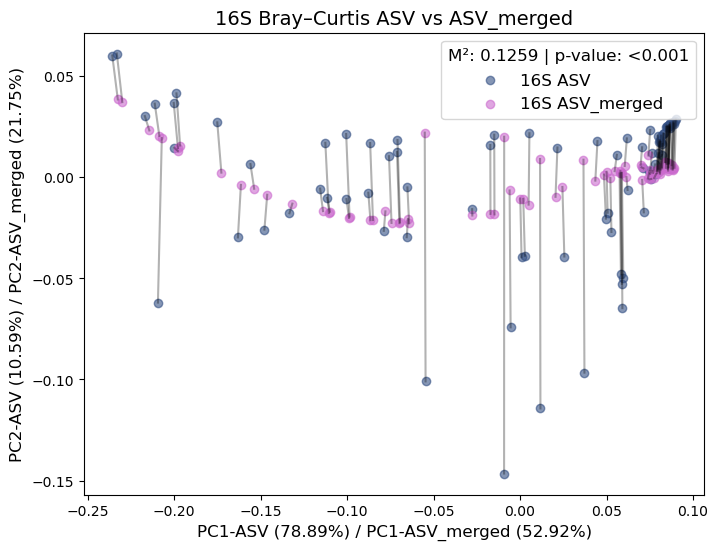

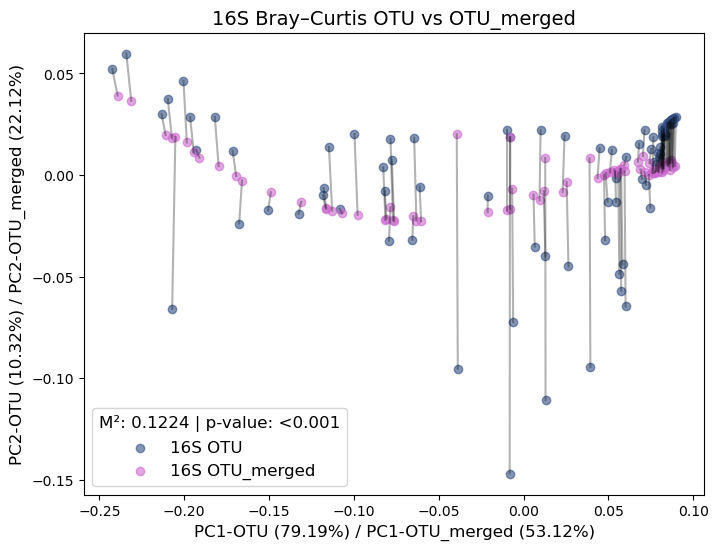

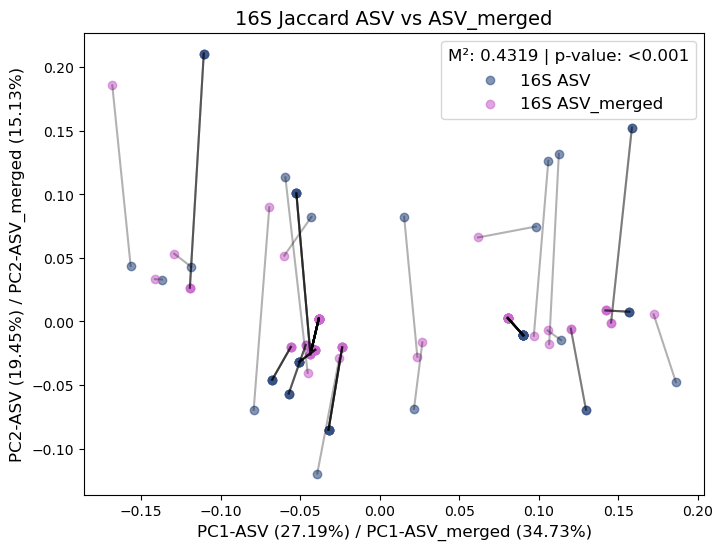

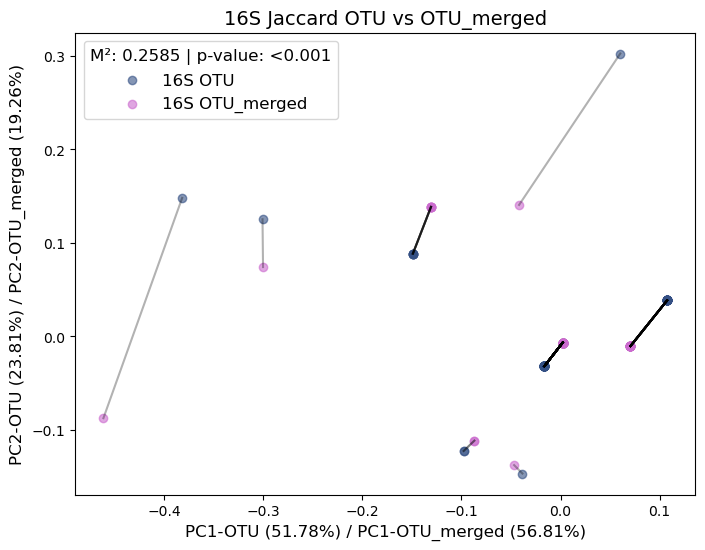

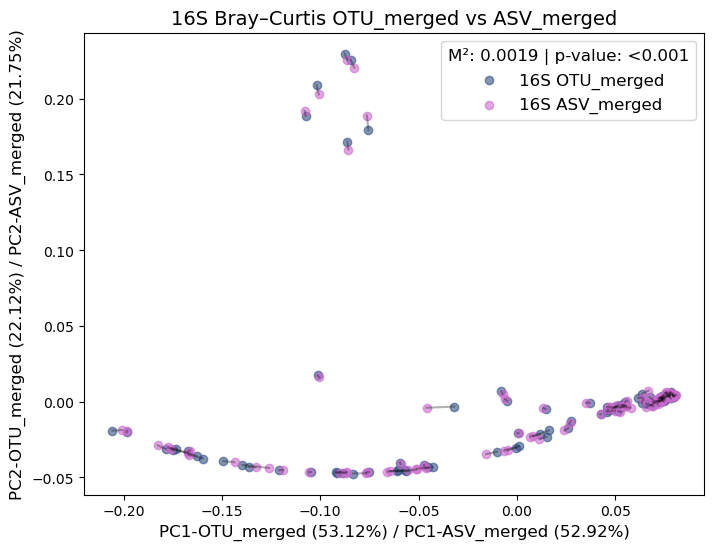

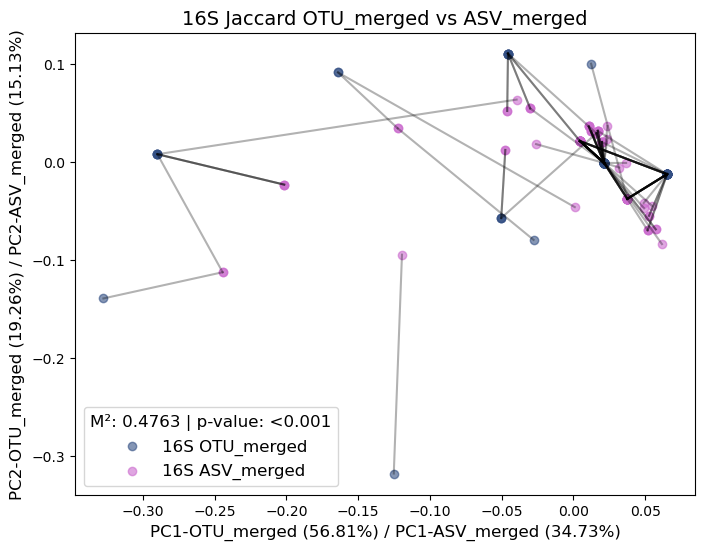

In [46]:
import matplotlib.pyplot as plt

def plot_procrustes(pcoa1, pcoa2, title, var1, var2, disparity_df, comp_nr, approach1, approach2):
    """Plots Procrustes-transformed PCoA results with connections between corresponding samples."""
    plt.figure(figsize=(8, 6))

    plt.scatter(pcoa1["PCo1"], pcoa1["PCo2"], color="#345084FF", label=f"16S {approach1}", alpha=0.6)
    plt.scatter(pcoa2["PCo1"], pcoa2["PCo2"], color="#CB6BCEFF", label=f"16S {approach2}", alpha=0.6)
    
    for i in range(len(pcoa1)):
        plt.plot([pcoa1.iloc[i, 0], pcoa2.iloc[i, 0]], 
                 [pcoa1.iloc[i, 1], pcoa2.iloc[i, 1]], "k-", alpha=0.3)
    var1 = var1 *100
    var2 = var2 *100
    plt.xlabel(f"PC1-{approach1} ({var1[0]:.2f}%) / PC1-{approach2} ({var2[0]:.2f}%)", fontsize=12)
    plt.ylabel(f"PC2-{approach1} ({var1[1]:.2f}%) / PC2-{approach2} ({var2[1]:.2f}%)", fontsize=12)

    #add a legend including also the observed disparity and p-value:
    pval = disparity_df["P-value"][comp_nr]
    if pval < 0.001:
        plt.legend(title=f"M²: {disparity_df['Observed Disparity'][comp_nr]:.4f} | p-value: <0.001", fontsize=12, title_fontsize=12)
    else:
        plt.legend(title=f"M²: {disparity_df['Observed Disparity'][comp_nr]:.4f} | p-value: {disparity_df['P-value'][comp_nr]:.3f}", fontsize=12, title_fontsize=12)
    #plt.legend(title=f"M2: {disparity_df['Observed Disparity'][comp_nr]:.4f} | p-value: {disparity_df['P-value'][comp_nr]:.4f}")
    plt.title(title, fontsize=14)
    plt.show()


# Plot Procrustes alignments

#put it those variances:

# Bray–Curtis: ASV vs ASV_merged
plot_procrustes(
    pcoa_bray_ASV_ASVmerge_trans, pcoa_bray_ASVmerge_ASV_trans,
    "16S Bray–Curtis ASV vs ASV_merged",
    variance_bray_curtis_ASV, variance_bray_curtis_ASV_merged,
    pcoa_results_df, comp_nr=0,
    approach1="ASV", approach2="ASV_merged"
)

# Bray–Curtis: OTU vs OTU_merged
plot_procrustes(
    pcoa_bray_OTU_OTUmerge_trans, pcoa_bray_OTUmerge_OTU_trans,
    "16S Bray–Curtis OTU vs OTU_merged",
    variance_bray_curtis_OTU, variance_bray_curtis_OTU_merged,
    pcoa_results_df, comp_nr=1,
    approach1="OTU", approach2="OTU_merged"
)

# Jaccard: ASV vs ASV_merged
plot_procrustes(
    pcoa_jaccard_ASV_ASVmerge_trans, pcoa_jaccard_ASVmerge_ASV_trans,
    "16S Jaccard ASV vs ASV_merged",
    variance_jaccard_ASV, variance_jaccard_ASV_merged,
    pcoa_results_df, comp_nr=2,
    approach1="ASV", approach2="ASV_merged"
)

# Jaccard: OTU vs OTU_merged
plot_procrustes(
    pcoa_jaccard_OTU_OTUmerge_trans, pcoa_jaccard_OTUmerge_OTU_trans,
    "16S Jaccard OTU vs OTU_merged",
    variance_jaccard_OTU, variance_jaccard_OTU_merged,
    pcoa_results_df, comp_nr=3,
    approach1="OTU", approach2="OTU_merged"
)

# Bray–Curtis: ASV_merged vs OTU_merged
plot_procrustes(
    pcoa_bray_OTU_ASV_trans, pcoa_bray_ASV_OTU_trans,
    "16S Bray–Curtis OTU_merged vs ASV_merged",
    variance_bray_curtis_OTU_merged, variance_bray_curtis_ASV_merged,
    pcoa_results_df, comp_nr=4,
    approach1="OTU_merged", approach2="ASV_merged"
)

# Jaccard: ASV_merged vs OTU_merged
plot_procrustes(
    pcoa_jaccard_OTU_ASV_trans, pcoa_jaccard_ASV_OTU_trans,
    "16S Jaccard OTU_merged vs ASV_merged",
    variance_jaccard_OTU_merged, variance_jaccard_ASV_merged,
    pcoa_results_df, comp_nr=5,
    approach1="OTU_merged", approach2="ASV_merged"
)


In [47]:
metadata_16S

,identifier,row,column,temperature,day,replicate,well,DNA yield,DNA_total_yield_per_1g,pH,...,yeast CFUs,mannitol,glucose,fructose,sucrose,maltose,succinic acid,lactic acid,acetic acid,ethanol
SampleID,,,,,,,,,,,,,,,,,,,,,
366294_209-LP4-16S-0709,W00.00.00,E,5.0,20,0,0,E05,7.819449,5212.964986,3.71,...,6.95664,0.864599,0.412389,0.040404,-0.029735456,4.793423904,0.692311,5.529438,1.114068,9.050184
366294_255-LP4-16S-0755,W04.01.01,C,11.0,4,1,1,C11,7.974214,5316.141023,3.66,...,7.51433,1.678354,0.276854,0.039286,0.02639304,0.925282319,1.589185,33.236525,5.061100,38.362742
366294_237-LP4-16S-0737,W04.01.02,A,9.0,4,2,1,A09,3.321537,2214.357237,3.67,...,7.45165,0.662367,0.097518,0.007847,-0.047546617,0.216395132,0.738389,4.979223,1.166086,11.177099
366294_198-LP4-16S-0698,W04.01.03,B,4.0,4,3,1,B04,6.282538,4188.357582,3.68,...,7.31960,1.717166,0.214524,0.015318,-0.059561247,0.397240918,1.762174,39.645533,6.040320,44.776757
366294_240-LP4-16S-0740,W04.01.04,D,9.0,4,4,1,D09,5.447592,3631.727200,3.65,...,7.33935,1.206856,0.155969,-0.003239,-0.005661029,0.144521676,1.044392,17.353094,2.135035,19.508957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_196-LP4-16S-0696,W30.03.07,H,3.0,30,7,3,H03,1.280016,853.343932,3.80,...,4.98345,1.412295,0.129658,0.016761,#VALUE!,#VALUE!,1.844159,16.756220,3.679490,18.576245
366294_245-LP4-16S-0745,W30.03.10,A,10.0,30,10,3,A10,1.207511,805.007259,3.81,...,4.06306,1.287481,0.150572,0.031233,#VALUE!,#VALUE!,0.753777,9.580818,6.009673,13.338592
366294_252-LP4-16S-0752,W30.03.14,H,10.0,30,14,3,H10,0.645679,430.452236,3.89,...,3.20412,1.272025,0.251672,0.083768,-0.030172078,#VALUE!,4.609512,12.322692,31.336045,8.974766


In [50]:
metadata = metadata_16S.copy()

In [52]:
metadata

,identifier,row,column,temperature,day,replicate,well,DNA yield,DNA_total_yield_per_1g,pH,...,yeast CFUs,mannitol,glucose,fructose,sucrose,maltose,succinic acid,lactic acid,acetic acid,ethanol
SampleID,,,,,,,,,,,,,,,,,,,,,
366294_209-LP4-16S-0709,W00.00.00,E,5.0,20,0,0,E05,7.819449,5212.964986,3.71,...,6.95664,0.864599,0.412389,0.040404,-0.029735456,4.793423904,0.692311,5.529438,1.114068,9.050184
366294_255-LP4-16S-0755,W04.01.01,C,11.0,4,1,1,C11,7.974214,5316.141023,3.66,...,7.51433,1.678354,0.276854,0.039286,0.02639304,0.925282319,1.589185,33.236525,5.061100,38.362742
366294_237-LP4-16S-0737,W04.01.02,A,9.0,4,2,1,A09,3.321537,2214.357237,3.67,...,7.45165,0.662367,0.097518,0.007847,-0.047546617,0.216395132,0.738389,4.979223,1.166086,11.177099
366294_198-LP4-16S-0698,W04.01.03,B,4.0,4,3,1,B04,6.282538,4188.357582,3.68,...,7.31960,1.717166,0.214524,0.015318,-0.059561247,0.397240918,1.762174,39.645533,6.040320,44.776757
366294_240-LP4-16S-0740,W04.01.04,D,9.0,4,4,1,D09,5.447592,3631.727200,3.65,...,7.33935,1.206856,0.155969,-0.003239,-0.005661029,0.144521676,1.044392,17.353094,2.135035,19.508957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366294_196-LP4-16S-0696,W30.03.07,H,3.0,30,7,3,H03,1.280016,853.343932,3.80,...,4.98345,1.412295,0.129658,0.016761,#VALUE!,#VALUE!,1.844159,16.756220,3.679490,18.576245
366294_245-LP4-16S-0745,W30.03.10,A,10.0,30,10,3,A10,1.207511,805.007259,3.81,...,4.06306,1.287481,0.150572,0.031233,#VALUE!,#VALUE!,0.753777,9.580818,6.009673,13.338592
366294_252-LP4-16S-0752,W30.03.14,H,10.0,30,14,3,H10,0.645679,430.452236,3.89,...,3.20412,1.272025,0.251672,0.083768,-0.030172078,#VALUE!,4.609512,12.322692,31.336045,8.974766


In [54]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_procrustes(pcoa1, pcoa2, title, var1, var2, disparity_df, comp_nr, approach1, approach2, metadata):
    """Plots Procrustes-transformed PCoA results with connections between corresponding samples,
       colored by fermentation temperature (same base color, lighter for approach1, darker for approach2).
    """
    temperatures = metadata.loc[pcoa1.index, "temperature"]  # numeric variable
    
    # Normalize temperature range for consistent colormap mapping
    norm = mcolors.Normalize(vmin=temperatures.min(), vmax=temperatures.max())
    cmap = cm.viridis  # or any other perceptually uniform colormap

    # Color mapping for each sample
    colors1 = [mcolors.to_hex(cmap(norm(temp), alpha=0.5)) for temp in temperatures]  # lighter
    colors2 = [mcolors.to_hex(cmap(norm(temp), alpha=1.0)) for temp in temperatures]  # darker

    fig, ax = plt.subplots(figsize=(8, 6))

    # Scatter plots
    sc1 = ax.scatter(pcoa1["PCo1"], pcoa1["PCo2"], c=colors1, edgecolors="k", label=f"{approach1} (lighter)", alpha=0.6)
    sc2 = ax.scatter(pcoa2["PCo1"], pcoa2["PCo2"], c=colors2, edgecolors="k", label=f"{approach2} (darker)", alpha=0.9)

    # Connecting lines
    for i in range(len(pcoa1)):
        ax.plot([pcoa1.iloc[i, 0], pcoa2.iloc[i, 0]],
                [pcoa1.iloc[i, 1], pcoa2.iloc[i, 1]], "k-", alpha=0.3)

    # Axis labels
    ax.set_xlabel(f"PC1-{approach1} ({var1[0]:.2f}%) / PC1-{approach2} ({var2[0]:.2f}%)", fontsize=12)
    ax.set_ylabel(f"PC2-{approach1} ({var1[1]:.2f}%) / PC2-{approach2} ({var2[1]:.2f}%)", fontsize=12)

    # Title
    ax.set_title(title, fontsize=14)

    # Colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, label="Fermentation temperature (°C)")

    # Procrustes legend (outside)
    pval = disparity_df["P-value"][comp_nr]
    disparity = disparity_df["Observed Disparity"][comp_nr]
    legend_title = f"M²: {disparity:.4f} | p-value: <0.001" if pval < 0.001 else f"M²: {disparity:.4f} | p-value: {pval:.3f}"

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legend_title, fontsize=12, title_fontsize=12)

    fig.tight_layout()
    plt.show()



/scratch/meyeanni/tmp/ipykernel_2133937/3847255670.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval = disparity_df["P-value"][comp_nr]
/scratch/meyeanni/tmp/ipykernel_2133937/3847255670.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  disparity = disparity_df["Observed Disparity"][comp_nr]


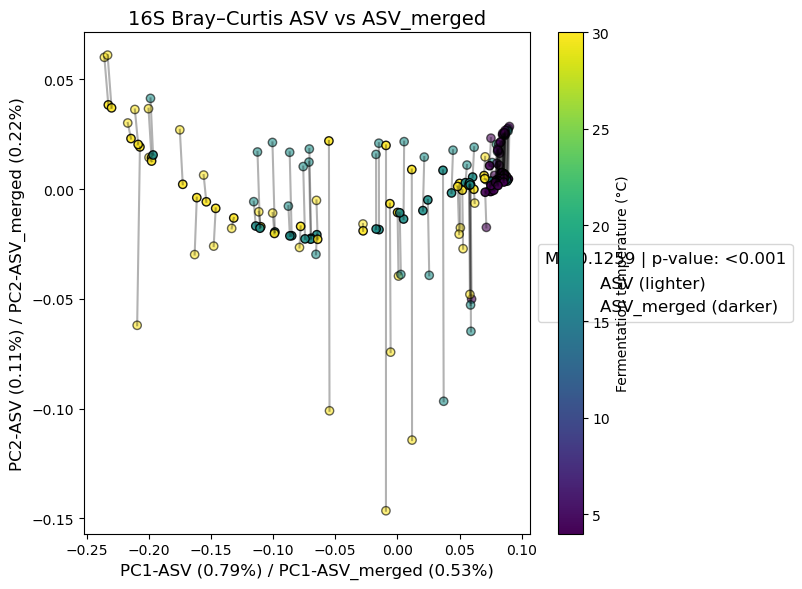

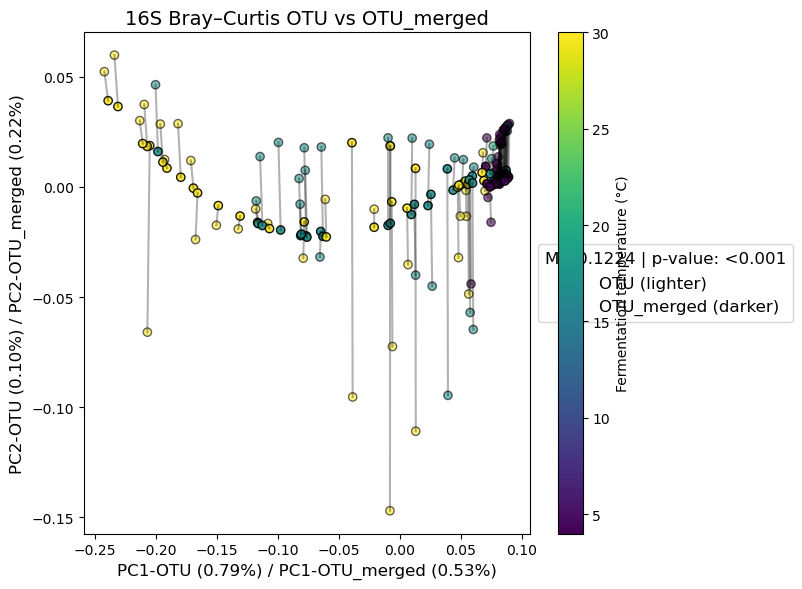

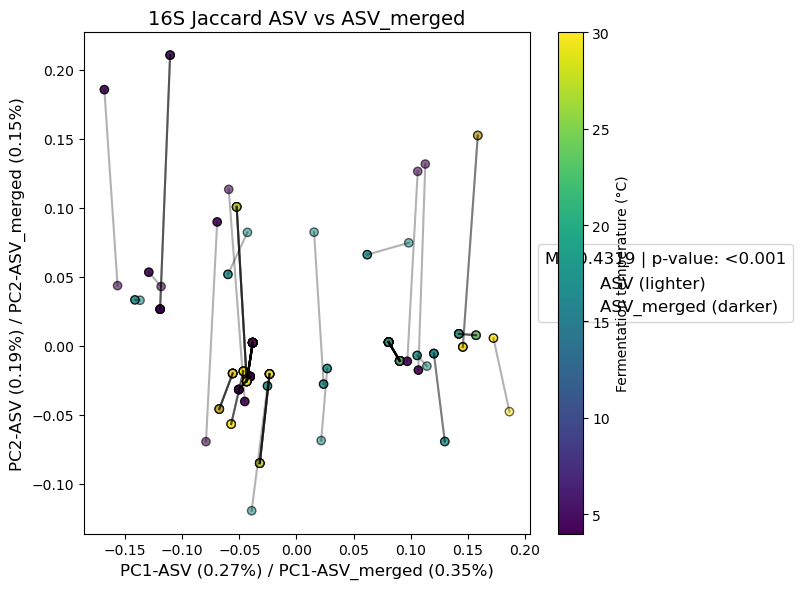

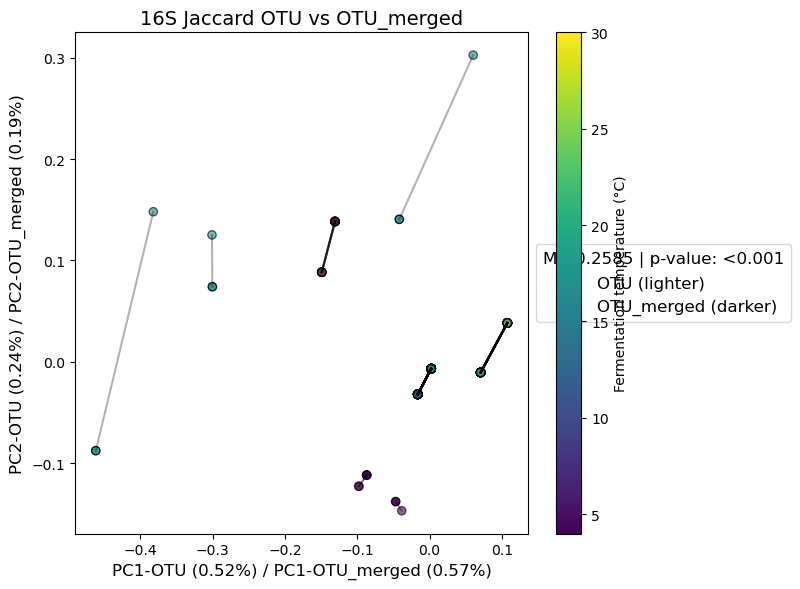

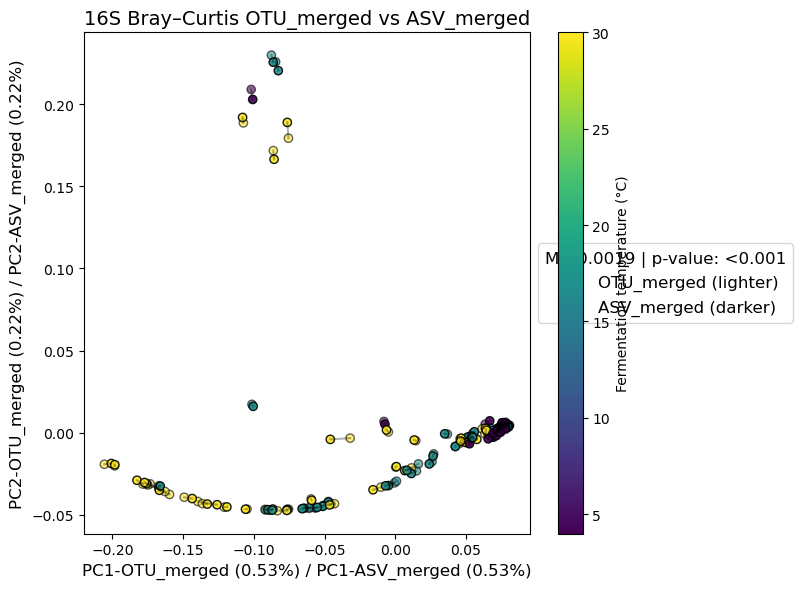

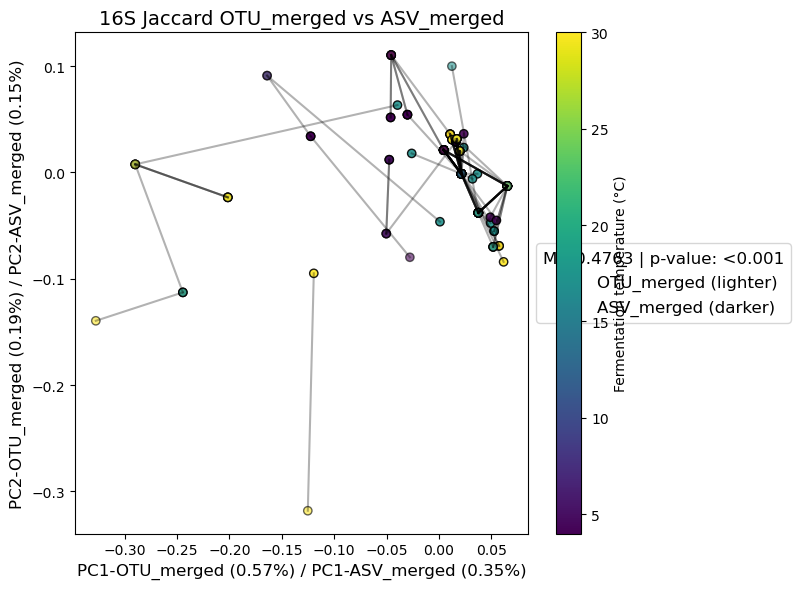

In [55]:
# Bray–Curtis: ASV vs ASV_merged
plot_procrustes(
    pcoa_bray_ASV_ASVmerge_trans, pcoa_bray_ASVmerge_ASV_trans,
    "16S Bray–Curtis ASV vs ASV_merged",
    variance_bray_curtis_ASV, variance_bray_curtis_ASV_merged,
    pcoa_results_df, comp_nr=0,
    approach1="ASV", approach2="ASV_merged",
    metadata=metadata
)

# Bray–Curtis: OTU vs OTU_merged
plot_procrustes(
    pcoa_bray_OTU_OTUmerge_trans, pcoa_bray_OTUmerge_OTU_trans,
    "16S Bray–Curtis OTU vs OTU_merged",
    variance_bray_curtis_OTU, variance_bray_curtis_OTU_merged,
    pcoa_results_df, comp_nr=1,
    approach1="OTU", approach2="OTU_merged",
    metadata=metadata
)

# Jaccard: ASV vs ASV_merged
plot_procrustes(
    pcoa_jaccard_ASV_ASVmerge_trans, pcoa_jaccard_ASVmerge_ASV_trans,
    "16S Jaccard ASV vs ASV_merged",
    variance_jaccard_ASV, variance_jaccard_ASV_merged,
    pcoa_results_df, comp_nr=2,
    approach1="ASV", approach2="ASV_merged",
    metadata=metadata
)

# Jaccard: OTU vs OTU_merged
plot_procrustes(
    pcoa_jaccard_OTU_OTUmerge_trans, pcoa_jaccard_OTUmerge_OTU_trans,
    "16S Jaccard OTU vs OTU_merged",
    variance_jaccard_OTU, variance_jaccard_OTU_merged,
    pcoa_results_df, comp_nr=3,
    approach1="OTU", approach2="OTU_merged",
    metadata=metadata
)

# Bray–Curtis: ASV_merged vs OTU_merged
plot_procrustes(
    pcoa_bray_OTU_ASV_trans, pcoa_bray_ASV_OTU_trans,
    "16S Bray–Curtis OTU_merged vs ASV_merged",
    variance_bray_curtis_OTU_merged, variance_bray_curtis_ASV_merged,
    pcoa_results_df, comp_nr=4,
    approach1="OTU_merged", approach2="ASV_merged",
    metadata=metadata
)

# Jaccard: ASV_merged vs OTU_merged
plot_procrustes(
    pcoa_jaccard_OTU_ASV_trans, pcoa_jaccard_ASV_OTU_trans,
    "16S Jaccard OTU_merged vs ASV_merged",
    variance_jaccard_OTU_merged, variance_jaccard_ASV_merged,
    pcoa_results_df, comp_nr=5,
    approach1="OTU_merged", approach2="ASV_merged",
    metadata=metadata
)


ok, that was a bit of a fail, will cluster based on time and temperature in a next script (both on merged and non-merged tables). but first, also ake annotated feature tables (species level)

available feature tables 16S:

- filtered_relative_frequency_table.qza
- filtered_table.qza

- merged_relative_frequency_table.qza
- merged_table.qza

-> make an annotated version for all of them!

have to make a taxa mapping for both OTUs and ASVs. first for OTUs (run through until saving the mapping file), then for ASVs (replace the artifact load for the taxonomy file, then rerun and save mapping file under another name)

In [19]:
#taxonomy_16S = q2.Artifact.load("/home/meyeanni/cloud/meyeanni/LP5/artifacts/16S/SILVA/silva-138.2-ssu-nr99-tax-515f-806r-derep-uniq.qza") #this is for OTUs

taxonomy_16S = q2.Artifact.load("/home/meyeanni/cloud/meyeanni/LP4/artifacts/16S/sklearn/taxonomy_dada2.qza") #this is for ASVs
# Convert taxonomy to DataFrame
taxonomy_16S_df = taxonomy_16S.view(pd.DataFrame)
taxonomy_16S_df.head()
# Split taxonomy column into separate levels
taxonomy_16S_df[['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']] = taxonomy_16S_df['Taxon'].str.split(';', expand=True)

# taxonomy_ITS = q2.Artifact.load("UNITE/unite-10-99-all-euk-no-singletons-taxa-cleaned-derep.qza")
# # Convert taxonomy to DataFrame
# taxonomy_ITS_df = taxonomy_ITS.view(pd.DataFrame)
# taxonomy_ITS_df.head()
# # Split taxonomy column into separate levels
# taxonomy_ITS_df[['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'Subspecies']] = taxonomy_ITS_df['Taxon'].str.split(';', expand=True)


In [20]:
# Ensure Species column is stripped of whitespace
taxonomy_16S_df['Species'] = taxonomy_16S_df['Species'].str.strip()

# Debugging step: Check unique values in Species column
print("Unique species before renaming:")
print(taxonomy_16S_df['Species'].unique())

# Redefine the function to rename species
def rename_species(row):
    # Keywords indicating uncertainty or placeholder names
    keywords = ['uncultured', 'metagenome', 'unidentified', 'bacterium_b4-c2-p2d8', 'unclassified']
    
    # Check if the species name contains any keyword or is NaN
    if pd.isna(row['Species']) or any(keyword in str(row['Species']).lower() for keyword in keywords):
        # Replace species name with genus-based name
        renamed = f"s__{row['Genus'].replace('g__', '').strip()}_sp."
        print(f"Renaming '{row['Species']}' to '{renamed}' (genus-based)")  # Debugging output
        
        # If the renamed species still results in "s__bacterium_sp."
        if 'bacterium' in renamed.lower():
            if pd.notna(row['Family']):
                # Replace with family-based name
                renamed = f"s__{row['Family'].replace('f__', '').strip()}_sp."
                print(f"Renaming genus-based '{renamed}' to family-based '{renamed}'")
        
        return renamed
    else:
        # Keep the original species name
        return row['Species']




# Apply the renaming function across the DataFrame
taxonomy_16S_df['Species'] = taxonomy_16S_df.apply(rename_species, axis=1)

# Debugging: Check for remaining uncultured/metagenome entries
remaining_uncultured = taxonomy_16S_df[
    taxonomy_16S_df['Species'].str.contains('uncultured|metagenome|sedis', case=False, na=False)
]
print("Remaining uncultured species after renaming:")
print(remaining_uncultured)

# Final unique species names after renaming
print("Unique species after renaming:")
print(taxonomy_16S_df['Species'].unique())

Unique species before renaming:
['s__Triticum_urartu' 's__[Clostridium]_colinum' 's__Cupressus_chengiana'
 ... 's__uncultured_candidate_division_GN10_bacterium'
 's__Nanoarchaeota_archaeon_SCGC_AAA011-D5' 's__Euglenea']
Renaming 's__uncultured_bacterium' to 's__Incertae_Sedis_sp.' (genus-based)
Renaming 's__metagenome' to 's__Incertae_Sedis_sp.' (genus-based)
Renaming 's__metagenome' to 's__Incertae_Sedis_sp.' (genus-based)
Renaming 's__uncultured_bacterium' to 's__Incertae_Sedis_sp.' (genus-based)
Renaming 's__uncultured_bacterium' to 's__Incertae_Sedis_sp.' (genus-based)
Renaming 's__uncultured_bacterium' to 's__Incertae_Sedis_sp.' (genus-based)
Renaming 's__uncultured_bacterium' to 's__Incertae_Sedis_sp.' (genus-based)
Renaming 's__uncultured_sediment_bacterium' to 's__Incertae_Sedis_sp.' (genus-based)
Renaming 's__uncultured_forest_soil_bacterium' to 's__Acidicaldus_sp.' (genus-based)
Renaming 's__uncultured_bacterium' to 's__Faecalibacterium_sp.' (genus-based)
Renaming genus-based

only needed for ITS (separately)

In [ ]:
# # Ensure Species column is stripped of whitespace
# taxonomy_ITS_df['Species'] = taxonomy_ITS_df['Species'].str.strip()

# # Debugging step: Check unique values in Species column
# print("Unique species before renaming:")
# print(taxonomy_ITS_df['Species'].unique())

# # Redefine the function to rename species
# def rename_species(row):
#     # Check if 'uncultured' or 'metagenome' appears in the species name
#     if 'uncultured' in row['Species'].lower() or 'metagenome' in row['Species'].lower() or 'unidentified' in row['Species'].lower():
#         # Replace species name with genus-based name
#         renamed = f"s__{row['Genus'].replace('g__', '').strip()}_sp"
#         print(f"Renaming '{row['Species']}' to '{renamed}'")  # Debugging output
#         return renamed
#     else:
#         # Keep the original species name
#         return row['Species']

# # Apply the renaming function across the DataFrame
# taxonomy_ITS_df['Species'] = taxonomy_ITS_df.apply(rename_species, axis=1)

# # Debugging: Check for remaining uncultured/metagenome entries
# remaining_uncultured = taxonomy_ITS_df[
#     taxonomy_ITS_df['Species'].str.contains('uncultured|metagenome', case=False, na=False)
# ]
# print("Remaining uncultured species after renaming:")
# print(remaining_uncultured)

# # Final unique species names after renaming
# print("Unique species after renaming:")
# print(taxonomy_ITS_df['Species'].unique())

In [21]:
# Extract the first two words of the species name
taxonomy_16S_df["Species"] = (
    taxonomy_16S_df["Species"]
    .str.replace("s__", "", regex=False)
    .str.replace("_", " ", regex=False)
    .fillna("Unclassified")
    .str.extract(r'^(\S+(?:\s+\S+)?)')[0]  # Extract first one or two words
    .fillna("Unclassified")  # Handle any NaNs after extraction
)

# taxonomy_ITS_df["Species"] = (
#     taxonomy_ITS_df["Species"]
#     .str.replace("s__", "", regex=False)
#     .str.replace("_", " ", regex=False)
#     .str.replace(" sp", " sp.", regex=False)
#     .fillna("Unclassified")
#     .str.extract(r'^(\S+(?:\s+\S+)?)')[0]  # Extract first one or two words
#     .fillna("Unclassified")
# )


# # Create mapping dictionaries from Feature ID to species
taxa_mapping_16S_s = taxonomy_16S_df["Species"].to_dict()
# taxa_mapping_ITS_s = taxonomy_ITS_df["Species"].to_dict()

In [8]:
pwd

'/home/meyeanni/cloud/meyeanni/LP4/artifacts/16S/split_exp/shipping_v2'

In [22]:
#export the mapping files so in the future they can be reimported instead of running the code again:

import pickle

# with open('taxa_mapping_16S_s.pkl', 'wb') as f: ## this is for OTUs
#     pickle.dump(taxa_mapping_16S_s, f)

with open('taxa_mapping_16S_asv.pkl', 'wb') as f: ## this is for ASVs
    pickle.dump(taxa_mapping_16S_s, f)    

# with open('taxa_mapping_ITS_s.pkl', 'wb') as f:
#     pickle.dump(taxa_mapping_ITS_s, f)

#load the mapping files:
    


to reimport the mapping dictionary:

In [23]:
import pickle

with open('taxa_mapping_16S_s.pkl', 'rb') as f:
    taxa_mapping_16S_s = pickle.load(f)


with open('taxa_mapping_16S_asv.pkl', 'rb') as f:
    taxa_mapping_16S_asv = pickle.load(f)    

# with open('taxa_mapping_ITS_s.pkl', 'rb') as f:
#     taxa_mapping_ITS_s = pickle.load(f)

In [24]:
taxa_mapping_16S_asv

{'2c628ab28244ea0a1abf54408590417d': 'Triticum urartu',
 '37239eacb119d556ba558e1661fed8c7': '[Clostridium] colinum',
 '92c3ec4fb62a23de35e17f1745b0145f': 'Triticum urartu',
 'e8f345749725faa93454ab59a769940a': 'Cupressus chengiana',
 'dcc2c5d17313b4580fd420ad7aab7bca': 'Candidatus Curtissbacteria',
 '7dbe190f3ccc88e02c9c3e2a7e38ee7b': 'Incertae Sedis',
 'f5d6a8a7e85b21d12161c02497d8ef45': 'Incertae Sedis',
 '3e5daef7b64f1dde5adff54f3c772f05': 'Incertae Sedis',
 'b2767d69e1ad643cdbea051ce1570771': 'Helcococcus seattlensis',
 'd972f1d7e6f8b89d0d52c73b996df3ca': 'Holospora curviuscula',
 '1d606ba5b62f896d561a5958b1dc9c11': 'Incertae Sedis',
 '8c0721dbc99c626864f4df6f15a95bc9': 'Incertae Sedis',
 '6e283dc60f38b980135f584363e0ccef': 'Incertae Sedis',
 '841e0b2d35156e98a3e6e380cd378945': 'Incertae Sedis',
 'f8434ca0c6cdd4d05342aef8d4660ea4': 'Metazoa',
 'a2298f8022b554e230dab7e6ff0aecea': 'Incertae Sedis',
 '5cab728305aec6641e967f1032c10491': 'Novosphingobium lentum',
 '1de894c4a11f8d624568

- filtered_relative_frequency_table.qza
- filtered_table.qza

- merged_relative_frequency_table.qza
- merged_table.qza

In [11]:
pwd

'/home/meyeanni/cloud/meyeanni/LP4/artifacts/16S/split_exp/shipping_v2'

ASVs:

In [14]:
filtered_rel_tab_ASV = qiime2.Artifact.load('ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_relative_frequency_table.qza')
# Extract the data as a pandas DataFrame
filtered_rel_tab_ASV = filtered_rel_tab_ASV.view(pd.DataFrame)

filtered_tab_ASV = qiime2.Artifact.load('ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza')
# Extract the data as a pandas DataFrame
filtered_tab_ASV = filtered_tab_ASV.view(pd.DataFrame)

merged_rel_tab_ASV = qiime2.Artifact.load('ASVs/alpha_rarefaction/core-metrics-results-1000/merged_relative_frequency_table.qza')
# Extract the data as a pandas DataFrame
merged_rel_tab_ASV = merged_rel_tab_ASV.view(pd.DataFrame)

merged_tab_ASV = qiime2.Artifact.load('ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza')
# Extract the data as a pandas DataFrame
merged_tab_ASV = merged_tab_ASV.view(pd.DataFrame)

OTUs:

In [15]:
filtered_rel_tab_OTU = qiime2.Artifact.load('OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_relative_frequency_table.qza')
# Extract the data as a pandas DataFrame
filtered_rel_tab_OTU = filtered_rel_tab_OTU.view(pd.DataFrame)

filtered_tab_OTU = qiime2.Artifact.load('OTUs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza')
# Extract the data as a pandas DataFrame
filtered_tab_OTU = filtered_tab_OTU.view(pd.DataFrame)

merged_rel_tab_OTU = qiime2.Artifact.load('OTUs/alpha_rarefaction/core-metrics-results-1000/merged_relative_frequency_table.qza')
# Extract the data as a pandas DataFrame
merged_rel_tab_OTU = merged_rel_tab_OTU.view(pd.DataFrame)

merged_tab_OTU = qiime2.Artifact.load('OTUs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza')
# Extract the data as a pandas DataFrame
merged_tab_OTU = merged_tab_OTU.view(pd.DataFrame)

In [16]:
merged_tab_OTU

,AB004757.1.1441,AB681216.1.1501,AJ419843.1.1442,AJ564009.1.1368,EU350220.1.1440,JQ009334.1.1546
366294_118-LP4-16S-0618,0.0,11.0,25.0,105.0,736.0,29.0
366294_121-LP4-16S-0621,0.0,0.0,46.0,0.0,0.0,0.0
366294_124-LP4-16S-0624,0.0,0.0,167.0,36.0,163.0,17.0
366294_128-LP4-16S-0628,0.0,35.0,611.0,114.0,108.0,120.0
366294_130-LP4-16S-0630,0.0,9.0,363.0,74.0,511.0,43.0
...,...,...,...,...,...,...
366294_263-LP4-16S-0763,1.0,4.0,20.0,317.0,601.0,55.0
366294_264-LP4-16S-0764,1.0,5.0,6.0,98.0,879.0,11.0
366294_265-LP4-16S-0765,2.0,56.0,34.0,308.0,535.0,65.0
366294_266-LP4-16S-0766,1.0,87.0,16.0,412.0,412.0,72.0


In [18]:
# Replace Feature IDs with Species names
merged_tab_OTU.columns = [taxa_mapping_16S_s.get(feature, feature) for feature in merged_tab_OTU.columns]


# Check updated column names
print(merged_tab_OTU.columns)


# ordered_ITS.columns = [taxa_mapping_ITS_s.get(feature, feature) for feature in ordered_ITS.columns]
# print(ordered_ITS.columns)

Index(['Pantoea agglomerans', 'Pediococcus parvulus', 'Acetobacter cerevisiae',
       'Lactobacillus rossiae', 'Lactobacillus sanfranciscensis',
       'Lactobacillus brevis'],
      dtype='object')


In [26]:
filtered_rel_tab_OTU.columns = [taxa_mapping_16S_s.get(feature, feature) for feature in filtered_rel_tab_OTU.columns]


# Check updated column names
print(filtered_rel_tab_OTU.columns)

filtered_tab_OTU.columns = [taxa_mapping_16S_s.get(feature, feature) for feature in filtered_tab_OTU.columns]
# Check updated column names
print(filtered_tab_OTU.columns)

merged_rel_tab_OTU.columns = [taxa_mapping_16S_s.get(feature, feature) for feature in merged_rel_tab_OTU.columns]
# Check updated column names
print(merged_rel_tab_OTU.columns)



Index(['Acetobacter cerevisiae', 'Lactobacillus sanfranciscensis',
       'Pediococcus parvulus', 'Lactobacillus rossiae', 'Lactobacillus brevis',
       'Pantoea agglomerans'],
      dtype='object')
Index(['Acetobacter cerevisiae', 'Lactobacillus sanfranciscensis',
       'Pediococcus parvulus', 'Lactobacillus rossiae', 'Lactobacillus brevis',
       'Pantoea agglomerans'],
      dtype='object')
Index(['Pantoea agglomerans', 'Pediococcus parvulus', 'Acetobacter cerevisiae',
       'Lactobacillus rossiae', 'Lactobacillus sanfranciscensis',
       'Lactobacillus brevis'],
      dtype='object')


-->> no duplicate columns for OTUs, so no need to collapse

can directly export those dfs (to csv.)

In [31]:
pwd

'/home/meyeanni/cloud/meyeanni/LP4/artifacts/16S/split_exp/shipping_v2'

In [32]:


merged_tab_OTU.to_csv("OTUs/alpha_rarefaction/core-metrics-results-1000/20250510_merged_features_OTU_species_names.csv")
filtered_rel_tab_OTU.to_csv("OTUs/alpha_rarefaction/core-metrics-results-1000/20250510_relative_features_OTU_species_names.csv")
filtered_tab_OTU.to_csv("OTUs/alpha_rarefaction/core-metrics-results-1000/20250510_features_OTU_species_names.csv")
merged_rel_tab_OTU.to_csv("OTUs/alpha_rarefaction/core-metrics-results-1000/20250510_merged_relative_features_OTU_species_names.csv")

ASVs:

In [25]:
# Replace Feature IDs with Species names
merged_tab_ASV.columns = [taxa_mapping_16S_asv.get(feature, feature) for feature in merged_tab_ASV.columns]


# Check updated column names
print(merged_tab_ASV.columns)

Index(['Lactobacillus sanfranciscensis', 'Pediococcus sp.',
       'Acetobacter pasteurianus', 'Acetobacter pasteurianus',
       'Bacillus halotolerans', 'Lactobacillus sanfranciscensis',
       'Lactobacillus brevis', 'Acetobacter pasteurianus',
       'Lactobacillus sanfranciscensis', 'Pantoea agglomerans',
       'Lactobacillus rossiae', 'Lactobacillus sanfranciscensis'],
      dtype='object')


In [27]:
# Replace Feature IDs with Species names
filtered_rel_tab_ASV.columns = [taxa_mapping_16S_asv.get(feature, feature) for feature in filtered_rel_tab_ASV.columns]
# Check updated column names
print(filtered_rel_tab_ASV.columns)

# Replace Feature IDs with Species names
filtered_tab_ASV.columns = [taxa_mapping_16S_asv.get(feature, feature) for feature in filtered_tab_ASV.columns]
# Check updated column names
print(filtered_tab_ASV.columns)

# Replace Feature IDs with Species names
merged_rel_tab_ASV.columns = [taxa_mapping_16S_asv.get(feature, feature) for feature in merged_rel_tab_ASV.columns]
# Check updated column names
print(merged_rel_tab_ASV.columns)

Index(['Acetobacter pasteurianus', 'Bacillus halotolerans',
       'Lactobacillus sanfranciscensis', 'Pediococcus sp.',
       'Pantoea agglomerans', 'Acetobacter pasteurianus',
       'Lactobacillus sanfranciscensis', 'Lactobacillus sanfranciscensis',
       'Lactobacillus rossiae', 'Lactobacillus sanfranciscensis',
       'Lactobacillus brevis', 'Acetobacter pasteurianus'],
      dtype='object')
Index(['Acetobacter pasteurianus', 'Bacillus halotolerans',
       'Lactobacillus sanfranciscensis', 'Pediococcus sp.',
       'Pantoea agglomerans', 'Acetobacter pasteurianus',
       'Lactobacillus sanfranciscensis', 'Lactobacillus sanfranciscensis',
       'Lactobacillus rossiae', 'Lactobacillus sanfranciscensis',
       'Lactobacillus brevis', 'Acetobacter pasteurianus'],
      dtype='object')
Index(['Lactobacillus sanfranciscensis', 'Pediococcus sp.',
       'Acetobacter pasteurianus', 'Acetobacter pasteurianus',
       'Bacillus halotolerans', 'Lactobacillus sanfranciscensis',
       'L

-->> duplicate columns for ASVs, therefore collapse them at species level (same species name), at least for now

or better: make one table with collapsed species, and one where they get distinct ssp. 1 and so on to potentially have more fine grained resolution.

1. make dfs with unique names, without collapsing them

In [28]:
filtered_rel_tab_ASV_unique = filtered_rel_tab_ASV.copy()

filtered_tab_ASV_unique = filtered_tab_ASV.copy()

merged_rel_tab_ASV_unique = merged_rel_tab_ASV.copy()

merged_tab_ASV_unique = merged_tab_ASV.copy()

In [29]:
from collections import Counter

# Get the taxa names from the columns
taxa_names_16S_1 = list(filtered_rel_tab_ASV_unique.columns)
taxa_names_16S_2 = list(filtered_tab_ASV_unique .columns)
taxa_names_16S_3 = list(merged_rel_tab_ASV_unique.columns)
taxa_names_16S_4 = list(merged_tab_ASV_unique.columns)



# # Create a counter for duplicate taxa names
# taxa_counter_16S = Counter(taxa_names_16S)
# taxa_counter_ITS = Counter(taxa_names_ITS)

# # Check for duplicates
# print("Duplicate taxa in 16S:", [taxon for taxon, count in taxa_counter_16S.items() if count > 1])
# print("Duplicate taxa in ITS:", [taxon for taxon, count in taxa_counter_ITS.items() if count > 1])

In [30]:
def make_unique(taxa_names):
    """Appends unique suffixes to duplicate taxa names."""
    taxa_seen = {}
    unique_taxa_names = []
    for taxon in taxa_names:
        if taxon in taxa_seen:
            # Increment the counter and append a suffix
            taxa_seen[taxon] += 1
            unique_name = f"{taxon} ssg. {taxa_seen[taxon]}"
        else:
            # First occurrence of the taxon
            taxa_seen[taxon] = 1
            unique_name = taxon
        unique_taxa_names.append(unique_name)
    return unique_taxa_names

# Apply to both 16S and ITS taxa names
filtered_rel_tab_ASV_unique.columns = make_unique(taxa_names_16S_1)
filtered_tab_ASV_unique.columns = make_unique(taxa_names_16S_2)
merged_rel_tab_ASV_unique.columns = make_unique(taxa_names_16S_3)
merged_tab_ASV_unique.columns = make_unique(taxa_names_16S_4)

# Check updated column names
print("Updated taxa names for filtered_rel_tab_ASV_unique:", filtered_rel_tab_ASV_unique.columns)
print("Updated taxa names for filtered_tab_ASV_unique:", filtered_tab_ASV_unique.columns)
print("Updated taxa names for merged_rel_tab_ASV_unique:", merged_rel_tab_ASV_unique.columns)
print("Updated taxa names for merged_tab_ASV_unique:", merged_tab_ASV_unique.columns)

Updated taxa names for filtered_rel_tab_ASV_unique: Index(['Acetobacter pasteurianus', 'Bacillus halotolerans',
       'Lactobacillus sanfranciscensis', 'Pediococcus sp.',
       'Pantoea agglomerans', 'Acetobacter pasteurianus ssg. 2',
       'Lactobacillus sanfranciscensis ssg. 2',
       'Lactobacillus sanfranciscensis ssg. 3', 'Lactobacillus rossiae',
       'Lactobacillus sanfranciscensis ssg. 4', 'Lactobacillus brevis',
       'Acetobacter pasteurianus ssg. 3'],
      dtype='object')
Updated taxa names for filtered_tab_ASV_unique: Index(['Acetobacter pasteurianus', 'Bacillus halotolerans',
       'Lactobacillus sanfranciscensis', 'Pediococcus sp.',
       'Pantoea agglomerans', 'Acetobacter pasteurianus ssg. 2',
       'Lactobacillus sanfranciscensis ssg. 2',
       'Lactobacillus sanfranciscensis ssg. 3', 'Lactobacillus rossiae',
       'Lactobacillus sanfranciscensis ssg. 4', 'Lactobacillus brevis',
       'Acetobacter pasteurianus ssg. 3'],
      dtype='object')
Updated taxa n

save those feature tables:

In [33]:


filtered_rel_tab_ASV_unique.to_csv("ASVs/alpha_rarefaction/core-metrics-results-1000/20250510_relative_features_ASV_species_names_unique.csv")
filtered_tab_ASV_unique.to_csv("ASVs/alpha_rarefaction/core-metrics-results-1000/20250510_features_ASV_species_names_unique.csv")
merged_rel_tab_ASV_unique.to_csv("ASVs/alpha_rarefaction/core-metrics-results-1000/20250510_merged_relative_features_ASV_species_names_unique.csv")
merged_tab_ASV_unique.to_csv("ASVs/alpha_rarefaction/core-metrics-results-1000/20250510_merged_features_ASV_species_names_unique.csv")

and then also collapse them

In [ ]:
filtered_rel_tab_ASV_unique = filtered_rel_tab_ASV.copy()

filtered_tab_ASV_unique = filtered_tab_ASV.copy()

merged_rel_tab_ASV_unique = merged_rel_tab_ASV.copy()

merged_tab_ASV_unique = merged_tab_ASV.copy()

In [34]:
from collections import Counter

# Get the taxa names from the columns
taxa_names_16S_1 = list(filtered_rel_tab_ASV.columns)
taxa_names_16S_2 = list(filtered_tab_ASV.columns)
taxa_names_16S_3 = list(merged_rel_tab_ASV.columns)
taxa_names_16S_4 = list(merged_tab_ASV.columns)


# Create a counter for duplicate taxa names
taxa_counter_16S_1 = Counter(taxa_names_16S_1)
taxa_counter_16S_2 = Counter(taxa_names_16S_2)
taxa_counter_16S_3 = Counter(taxa_names_16S_3)
taxa_counter_16S_4 = Counter(taxa_names_16S_4)



# Check for duplicates
print("Duplicate taxa in 16S_1:", [taxon for taxon, count in taxa_counter_16S_1.items() if count > 1])
print("Duplicate taxa in 16S_2:", [taxon for taxon, count in taxa_counter_16S_2.items() if count > 1])
print("Duplicate taxa in 16S_3:", [taxon for taxon, count in taxa_counter_16S_3.items() if count > 1])
print("Duplicate taxa in 16S_4:", [taxon for taxon, count in taxa_counter_16S_4.items() if count > 1])


Duplicate taxa in 16S_1: ['Acetobacter pasteurianus', 'Lactobacillus sanfranciscensis']
Duplicate taxa in 16S_2: ['Acetobacter pasteurianus', 'Lactobacillus sanfranciscensis']
Duplicate taxa in 16S_3: ['Lactobacillus sanfranciscensis', 'Acetobacter pasteurianus']
Duplicate taxa in 16S_4: ['Lactobacillus sanfranciscensis', 'Acetobacter pasteurianus']


maybe will be useful for some ITS species, though here nothing to remove.

In [ ]:
# #remove columns labelled with 'bacterium':

# ordered_16S = ordered_16S.loc[:, ~ordered_16S.columns.str.contains('bacterium', case=False)]

In [35]:
# Combine columns with the same species name by summing their values
combined_16S_1 = filtered_rel_tab_ASV.groupby(by=filtered_rel_tab_ASV.columns, axis=1).sum()
combined_16S_2 = filtered_tab_ASV.groupby(by=filtered_tab_ASV.columns, axis=1).sum()
combined_16S_3 = merged_rel_tab_ASV.groupby(by=merged_rel_tab_ASV.columns, axis=1).sum()
combined_16S_4 = merged_tab_ASV.groupby(by=merged_tab_ASV.columns, axis=1).sum()



# Normalize the combined data so that each row sums to 1 (i.e., relative abundances)
#only do it for the relative abundance tables, not the feature tables!!
combined_16S_1 = combined_16S_1.div(combined_16S_1.sum(axis=1), axis=0)
#combined_16S_1 = combined_16S_1.div(combined_16S_1.sum(axis=1), axis=0)
combined_16S_3 = combined_16S_3.div(combined_16S_3.sum(axis=1), axis=0)
#combined_16S_1 = combined_16S_1.div(combined_16S_1.sum(axis=1), axis=0)


# Verify the normalization
print("Combined_16S_1 (each row should sum to 1):")
print(combined_16S_1.head())
print("Row sums:", combined_16S_1.sum(axis=1).head())

print("\nCombined_16S_3 (each row should sum to 1):")
print(combined_16S_3.head())
print("Row sums:", combined_16S_3.sum(axis=1).head())

Combined_16S_1 (each row should sum to 1):
                         Acetobacter pasteurianus  Bacillus halotolerans  \
366294_128-LP4-16S-0628                  0.643505                    0.0   
366294_130-LP4-16S-0630                  0.367000                    0.0   
366294_132-LP4-16S-0632                  0.018000                    0.0   
366294_173-LP4-16S-0673                  0.124623                    0.0   
366294_174-LP4-16S-0674                  0.004016                    0.0   

                         Lactobacillus brevis  Lactobacillus rossiae  \
366294_128-LP4-16S-0628              0.101712               0.114804   
366294_130-LP4-16S-0630              0.041000               0.073000   
366294_132-LP4-16S-0632              0.042000               0.152000   
366294_173-LP4-16S-0673              0.423116               0.069347   
366294_174-LP4-16S-0674              0.001004               0.010040   

                         Lactobacillus sanfranciscensis  Pantoea ag

/scratch/meyeanni/tmp/ipykernel_2225813/3689215394.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  combined_16S_1 = filtered_rel_tab_ASV.groupby(by=filtered_rel_tab_ASV.columns, axis=1).sum()
/scratch/meyeanni/tmp/ipykernel_2225813/3689215394.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  combined_16S_2 = filtered_tab_ASV.groupby(by=filtered_tab_ASV.columns, axis=1).sum()
/scratch/meyeanni/tmp/ipykernel_2225813/3689215394.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  combined_16S_3 = merged_rel_tab_ASV.groupby(by=merged_rel_tab_ASV.columns, axis=1).sum()
/scratch/meyeanni/tmp/ipykernel_2225813/3689215394.py:5: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  combined_16S_4 = merged_tab_ASV.groupby(by=merged_tab_ASV.columns

In [ ]:
# from collections import Counter

# # Get the taxa names from the columns
# taxa_names_16S = list(combined_16S.columns)
# taxa_names_ITS = list(combined_ITS.columns)

# # Create a counter for duplicate taxa names
# taxa_counter_16S = Counter(taxa_names_16S)
# taxa_counter_ITS = Counter(taxa_names_ITS)

# # Check for duplicates
# print("Duplicate taxa in 16S:", [taxon for taxon, count in taxa_counter_16S.items() if count > 1])
# print("Duplicate taxa in ITS:", [taxon for taxon, count in taxa_counter_ITS.items() if count > 1])

In [ ]:
combined_16S_1 = filtered_rel_tab_ASV.groupby(by=filtered_rel_tab_ASV.columns, axis=1).sum()
combined_16S_2 = filtered_tab_ASV.groupby(by=filtered_tab_ASV.columns, axis=1).sum()
combined_16S_3 = merged_rel_tab_ASV.groupby(by=merged_rel_tab_ASV.columns, axis=1).sum()
combined_16S_4 = merged_tab_ASV.groupby(by=merged_tab_ASV.columns, axis=1).sum()

In [36]:


combined_16S_1.to_csv("ASVs/alpha_rarefaction/core-metrics-results-1000/20250510_relative_features_ASV_species_names_combined.csv")
combined_16S_2.to_csv("ASVs/alpha_rarefaction/core-metrics-results-1000/20250510_features_ASV_species_names_combined.csv")
combined_16S_3.to_csv("ASVs/alpha_rarefaction/core-metrics-results-1000/20250510_merged_relative_features_ASV_species_names_combined.csv")
combined_16S_4.to_csv("ASVs/alpha_rarefaction/core-metrics-results-1000/20250510_merged_features_ASV_species_names_combined.csv")

-->> great, now everything should be ready to start with stats!!

-->> do the same for ITS as well!

In [ ]:
# #and import:
# ordered_16S = pd.read_csv("20250424_16S_relative_abundance_table_for_report_generation.csv", index_col=0)
# ordered_ITS = pd.read_csv("20250424_ITS_relative_abundance_table_for_report_generation.csv", index_col=0)

## last but not least, generate kmer table from the non-merged and merged ASV tables

In [4]:
pwd

'/home/meyeanni/cloud/meyeanni/LP4/artifacts/16S/split_exp/shipping_v2'

In [ ]:
filtered_tab_ASV = qiime2.Artifact.load('ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza')
# Extract the data as a pandas DataFrame
filtered_tab_ASV = filtered_tab_ASV.view(pd.DataFrame)


merged_tab_ASV = qiime2.Artifact.load('ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza')
# Extract the data as a pandas DataFrame
merged_tab_ASV = merged_tab_ASV.view(pd.DataFrame)

first, prepare the seq files, both combined and non-combined for ASVs

In [5]:
! qiime feature-table filter-seqs \
  --i-data ASVs/bacteria-seqs-filt-shipping-ASVs.qza \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza \
  --o-filtered-data ASVs/bacteria-seqs-filt-shipping-ASVs-1000.qza

Saved FeatureData[Sequence] to: ASVs/bacteria-seqs-filt-shipping-ASVs-1000.qza


In [6]:
! qiime feature-table filter-seqs \
  --i-data ASVs/bacteria-seqs-filt-shipping-ASVs.qza \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza \
  --o-filtered-data ASVs/bacteria-seqs-filt-shipping-ASVs-merged.qza

Saved FeatureData[Sequence] to: ASVs/bacteria-seqs-filt-shipping-ASVs-merged.qza


with dfidf:

In [9]:
! qiime kmerizer seqs-to-kmers \
  --i-sequences ASVs/bacteria-seqs-filt-shipping-ASVs-1000.qza \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza \
  --p-kmer-size 10 \
  --p-tfidf True \
  --output-dir ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/

Saved FeatureTable[Frequency] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/kmer_table.qza


no tfidf

In [10]:
! qiime kmerizer seqs-to-kmers \
  --i-sequences ASVs/bacteria-seqs-filt-shipping-ASVs-1000.qza \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/filtered_table.qza \
  --p-kmer-size 10 \
  --p-no-tfidf True \
  --output-dir ASVs/alpha_rarefaction_k/core-metrics-results-1000/

Saved FeatureTable[Frequency] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000/kmer_table.qza


merged:

In [11]:
! qiime kmerizer seqs-to-kmers \
  --i-sequences ASVs/bacteria-seqs-filt-shipping-ASVs-merged.qza \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza \
  --p-kmer-size 10 \
  --p-tfidf True \
  --output-dir ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/

Saved FeatureTable[Frequency] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/kmer_table.qza


In [12]:
! qiime kmerizer seqs-to-kmers \
  --i-sequences ASVs/bacteria-seqs-filt-shipping-ASVs-merged.qza \
  --i-table ASVs/alpha_rarefaction/core-metrics-results-1000/merged_table.qza \
  --p-kmer-size 10 \
  --p-no-tfidf True \
  --output-dir ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/

Saved FeatureTable[Frequency] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/kmer_table.qza


then compute metrics for all of them

In [13]:
#recalculate jaccard and bray curtis distances for the filtered tables (all three above), without rarefaction:
! qiime diversity beta --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/kmer_table.qza --p-metric jaccard --o-distance-matrix ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/filtered_table_jaccard_distance_matrix.qza
! qiime diversity beta --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/kmer_table.qza --p-metric braycurtis --o-distance-matrix ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/filtered_table_braycurtis_distance_matrix.qza



Saved DistanceMatrix to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/filtered_table_jaccard_distance_matrix.qza
Saved DistanceMatrix to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/filtered_table_braycurtis_distance_matrix.qza


In [14]:
#recalculate jaccard and bray curtis distances for the filtered tables (all three above), without rarefaction:
! qiime diversity beta --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000/kmer_table.qza --p-metric jaccard --o-distance-matrix ASVs/alpha_rarefaction_k/core-metrics-results-1000/filtered_table_jaccard_distance_matrix.qza
! qiime diversity beta --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000/kmer_table.qza --p-metric braycurtis --o-distance-matrix ASVs/alpha_rarefaction_k/core-metrics-results-1000/filtered_table_braycurtis_distance_matrix.qza

#recalculate jaccard and bray curtis distances for the filtered tables (all three above), without rarefaction:
! qiime diversity beta --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/kmer_table.qza --p-metric jaccard --o-distance-matrix ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/merged_table_jaccard_distance_matrix.qza
! qiime diversity beta --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/kmer_table.qza --p-metric braycurtis --o-distance-matrix ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/merged_table_braycurtis_distance_matrix.qza

#recalculate jaccard and bray curtis distances for the filtered tables (all three above), without rarefaction:
! qiime diversity beta --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/kmer_table.qza --p-metric jaccard --o-distance-matrix ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/merged_table_jaccard_distance_matrix.qza
! qiime diversity beta --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/kmer_table.qza --p-metric braycurtis --o-distance-matrix ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/merged_table_braycurtis_distance_matrix.qza



Saved DistanceMatrix to: ASVs/alpha_rarefaction_k/core-metrics-results-1000/filtered_table_jaccard_distance_matrix.qza
Saved DistanceMatrix to: ASVs/alpha_rarefaction_k/core-metrics-results-1000/filtered_table_braycurtis_distance_matrix.qza
Saved DistanceMatrix to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/merged_table_jaccard_distance_matrix.qza
Saved DistanceMatrix to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/merged_table_braycurtis_distance_matrix.qza
Saved DistanceMatrix to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/merged_table_jaccard_distance_matrix.qza
Saved DistanceMatrix to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/merged_table_braycurtis_distance_matrix.qza


### and then also the alpha-diversity metrics

In [15]:
# Example for filtered table
! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000/kmer_table.qza \
  --p-metric shannon \
  --o-alpha-diversity ASVs/alpha_rarefaction_k/core-metrics-results-1000/filtered_table_shannon.qza

! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000/kmer_table.qza \
  --p-metric simpson \
  --o-alpha-diversity ASVs/alpha_rarefaction_k/core-metrics-results-1000/filtered_table_simpson.qza

! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000/kmer_table.qza \
  --p-metric chao1 \
  --o-alpha-diversity ASVs/alpha_rarefaction_k/core-metrics-results-1000/filtered_table_chao1.qza






Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000/filtered_table_shannon.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000/filtered_table_simpson.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000/filtered_table_chao1.qza


In [16]:
# Example for filtered table
! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/kmer_table.qza \
  --p-metric shannon \
  --o-alpha-diversity ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/filtered_table_shannon.qza

! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/kmer_table.qza \
  --p-metric simpson \
  --o-alpha-diversity ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/filtered_table_simpson.qza

! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/kmer_table.qza \
  --p-metric chao1 \
  --o-alpha-diversity ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/filtered_table_chao1.qza

  # Example for filtered table
! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/kmer_table.qza \
  --p-metric shannon \
  --o-alpha-diversity ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/merged_table_shannon.qza

! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/kmer_table.qza \
  --p-metric simpson \
  --o-alpha-diversity ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/merged_table_simpson.qza

! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/kmer_table.qza \
  --p-metric chao1 \
  --o-alpha-diversity ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/merged_table_chao1.qza

  # Example for filtered table
! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/kmer_table.qza \
  --p-metric shannon \
  --o-alpha-diversity ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/merged_table_shannon.qza

! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/kmer_table.qza \
  --p-metric simpson \
  --o-alpha-diversity ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/merged_table_simpson.qza

! qiime diversity alpha \
  --i-table ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/kmer_table.qza \
  --p-metric chao1 \
  --o-alpha-diversity ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/merged_table_chao1.qza

Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/filtered_table_shannon.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/filtered_table_simpson.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf/filtered_table_chao1.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/merged_table_shannon.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/merged_table_simpson.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-merged/merged_table_chao1.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/merged_table_shannon.qza
Saved SampleData[AlphaDiversity] to: ASVs/alpha_rarefaction_k/core-metrics-results-1000-tfidf-merged/merged_table_simpson.qza
Saved SampleData[AlphaDiversi

ok now really everything is ready, switch to ITS!